# **Question 1**

In [ ]:
!pip install pycountry_convert
!pip install scikit-optimize
!pip install pydot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.7/107.7 kB 1.8 MB/s eta 0:00:00


In [ ]:
#imports and downloads required in this project
from google.colab import drive
import pandas as pd
import warnings
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.feature_selection import SelectKBest, mutual_info_regression, f_regression
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import cross_validate, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neural_network import MLPRegressor
from statsmodels.regression.linear_model import OLS
from sklearn.ensemble import RandomForestRegressor
import itertools
import numpy as np
import seaborn as sns
from sklearn.tree import export_graphviz
import pydot
from statsmodels.api import add_constant
import itertools
from scipy.stats import skew
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from skopt import BayesSearchCV
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import statsmodels.api as sm
import pydot
from IPython.display import Image
import graphviz
from sklearn.model_selection import train_test_split

In [ ]:
#mounting the drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#Reading the csv from drive and storing it in a dataframe
diamonds = pd.read_csv('gdrive/My Drive/Winter Quarter 2024/219 - Large Scale Data Mining/Project 4/diamonds_ece219.csv')
diamonds.shape


(149871, 15)

In [ ]:
#Seeing the first 5 rows of the dataset
diamonds.head()

,Unnamed: 0,color,clarity,carat,cut,symmetry,polish,depth_percent,table_percent,length,width,depth,girdle_min,girdle_max,price
0,0,E,VVS2,0.09,Excellent,Very Good,Very Good,62.7,59.0,2.85,2.87,1.79,M,M,200
1,1,E,VVS2,0.09,Very Good,Very Good,Very Good,61.9,59.0,2.84,2.89,1.78,STK,STK,200
2,2,E,VVS2,0.09,Excellent,Very Good,Very Good,61.1,59.0,2.88,2.90,1.77,TN,M,200
3,3,E,VVS2,0.09,Excellent,Very Good,Very Good,62.0,59.0,2.86,2.88,1.78,M,STK,200
4,4,E,VVS2,0.09,Very Good,Very Good,Excellent,64.9,58.5,2.79,2.83,1.82,STK,STK,200


In [ ]:
diamonds

,color,clarity,carat,cut,symmetry,polish,depth_percent,table_percent,length,width,depth,girdle_min,girdle_max,price
0,E,VVS2,0.09,Excellent,Very Good,Very Good,62.7,59.0,2.85,2.87,1.79,M,M,200
1,E,VVS2,0.09,Very Good,Very Good,Very Good,61.9,59.0,2.84,2.89,1.78,STK,STK,200
2,E,VVS2,0.09,Excellent,Very Good,Very Good,61.1,59.0,2.88,2.90,1.77,TN,M,200
3,E,VVS2,0.09,Excellent,Very Good,Very Good,62.0,59.0,2.86,2.88,1.78,M,STK,200
4,E,VVS2,0.09,Very Good,Very Good,Excellent,64.9,58.5,2.79,2.83,1.82,STK,STK,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149866,G,VS1,2.01,Excellent,Excellent,Excellent,63.0,59.0,7.98,8.03,5.05,STK,STK,31984
149867,F,VS2,1.90,Excellent,Excellent,Excellent,62.7,57.0,7.82,7.87,4.92,unknown,unknown,31989
149868,I,VVS1,2.45,Excellent,Excellent,Excellent,61.2,60.0,8.58,8.65,5.28,unknown,unknown,31989
149869,J,VVS2,2.50,Excellent,Excellent,Excellent,59.1,62.0,8.80,8.85,5.22,M,STK,31992


In [ ]:
#Dropping the unnamed column
diamonds = diamonds.drop(columns=['Unnamed: 0'])
diamonds.head()

,color,clarity,carat,cut,symmetry,polish,depth_percent,table_percent,length,width,depth,girdle_min,girdle_max,price
0,E,VVS2,0.09,Excellent,Very Good,Very Good,62.7,59.0,2.85,2.87,1.79,M,M,200
1,E,VVS2,0.09,Very Good,Very Good,Very Good,61.9,59.0,2.84,2.89,1.78,STK,STK,200
2,E,VVS2,0.09,Excellent,Very Good,Very Good,61.1,59.0,2.88,2.90,1.77,TN,M,200
3,E,VVS2,0.09,Excellent,Very Good,Very Good,62.0,59.0,2.86,2.88,1.78,M,STK,200
4,E,VVS2,0.09,Very Good,Very Good,Excellent,64.9,58.5,2.79,2.83,1.82,STK,STK,200


In [ ]:
#Creating a copy of the diamonds dataset
diamondsCopy = diamonds.copy(deep=True)

In [ ]:
#Finding the unique cut values
cut_values = diamondsCopy['cut'].unique()
print(cut_values)

['Excellent' 'Very Good']


In [ ]:
#Finding the unique color values
color_values = diamondsCopy['color'].unique()
print(color_values)

['E' 'F' 'D' 'J' 'I' 'G' 'H' 'M' 'L' 'K']


In [ ]:
#Finding the unique clarity values
clarity_values = diamondsCopy['clarity'].unique()
print(clarity_values)

['VVS2' 'VVS1' 'I1' 'VS1' 'VS2' 'IF' 'SI2' 'I2' 'SI1' 'I3']


In [ ]:
#Finding the unique symmetry values
symmetry_values = diamondsCopy['symmetry'].unique()
print(symmetry_values)

['Very Good' 'Excellent']


In [ ]:
#Finding the unique polish values
polish_values = diamondsCopy['polish'].unique()
print(polish_values)

['Very Good' 'Excellent']


In [ ]:
#Finding the unique girdle min values
girdle_min_values = diamondsCopy['girdle_min'].unique()
print(girdle_min_values)

['M' 'STK' 'TN' 'TK' 'unknown' 'VTN' 'XTN' 'VTK' 'STN' 'XTK']


In [ ]:
#Finding the unique girdle min values
girdle_max_values = diamondsCopy['girdle_max'].unique()
print(girdle_max_values)

['M' 'STK' 'TK' 'unknown' 'TN' 'VTK' 'VTN' 'XTN' 'STN' 'XTK']


In [ ]:
#Encoding the columns
cut_encoding = {'Very Good': 1,
           'Excellent': 2}

color_encoding = {'M' : 1,
           'L' : 2,
           'K': 3,
           'J': 4,
           'I': 5,
           'H': 6,
           'G': 7,
           'F': 8,
           'E': 9,
           'D': 10 }


clarity_encoding = {'I3' : 1,
                'I2' : 2,
                'I1' : 3,
                'SI2' : 4,
                'SI1': 5,
                'VS2': 6,
                'VS1': 7,
                'VVS2': 8,
                'VVS1': 9,
                'IF': 10}

symmetry_encoding = {'Very Good': 1,
                     'Excellent': 2}

polish_encoding = {'Very Good': 1,
                   'Excellent': 2}

girdle_encoding = {'unknown' : 0,
                   'XTK' : 1,
                   'XTN' : 2,
                   'VTN' : 4,
                   'VTK' : 5,
                   'TN' : 6,
                   'TK' : 7,
                   'STN' : 8,
                   'STK' : 9,
                    'M' : 10}

In [ ]:
#Creating columns for the encoded values
diamondsCopy['cut_encoded'] = diamondsCopy.cut.map(cut_encoding)
diamondsCopy['symmetry_encoded'] = diamondsCopy.symmetry.map(symmetry_encoding)
diamondsCopy['polish_encoded'] = diamondsCopy.polish.map(polish_encoding)

diamondsCopy['color_encoded'] = diamondsCopy.color.map(color_encoding)
diamondsCopy['clarity_encoded'] = diamondsCopy.clarity.map(clarity_encoding)

diamondsCopy['girdle_max_encoded'] = diamondsCopy.girdle_max.map(girdle_encoding)
diamondsCopy['girdle_min_encoded'] = diamondsCopy.girdle_min.map(girdle_encoding)
diamondsCopy.head()

,color,clarity,carat,cut,symmetry,polish,depth_percent,table_percent,length,width,...,girdle_min,girdle_max,price,cut_encoded,symmetry_encoded,polish_encoded,color_encoded,clarity_encoded,girdle_max_encoded,girdle_min_encoded
0,E,VVS2,0.09,Excellent,Very Good,Very Good,62.7,59.0,2.85,2.87,...,M,M,200,2,1,1,9,8,10,10
1,E,VVS2,0.09,Very Good,Very Good,Very Good,61.9,59.0,2.84,2.89,...,STK,STK,200,1,1,1,9,8,9,9
2,E,VVS2,0.09,Excellent,Very Good,Very Good,61.1,59.0,2.88,2.90,...,TN,M,200,2,1,1,9,8,10,6
3,E,VVS2,0.09,Excellent,Very Good,Very Good,62.0,59.0,2.86,2.88,...,M,STK,200,2,1,1,9,8,9,10
4,E,VVS2,0.09,Very Good,Very Good,Excellent,64.9,58.5,2.79,2.83,...,STK,STK,200,1,1,2,9,8,9,9


In [ ]:
#Dropping the original columns
finalDiamonds = diamondsCopy.drop(columns=['cut','symmetry','polish','color','clarity','girdle_min','girdle_max'])
finalDiamonds.head()

,carat,depth_percent,table_percent,length,width,depth,price,cut_encoded,symmetry_encoded,polish_encoded,color_encoded,clarity_encoded,girdle_max_encoded,girdle_min_encoded
0,0.09,62.7,59.0,2.85,2.87,1.79,200,2,1,1,9,8,10,10
1,0.09,61.9,59.0,2.84,2.89,1.78,200,1,1,1,9,8,9,9
2,0.09,61.1,59.0,2.88,2.90,1.77,200,2,1,1,9,8,10,6
3,0.09,62.0,59.0,2.86,2.88,1.78,200,2,1,1,9,8,9,10
4,0.09,64.9,58.5,2.79,2.83,1.82,200,1,1,2,9,8,9,9


<ipython-input-17-adf6dd9f3f01>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = diamonds.corr()


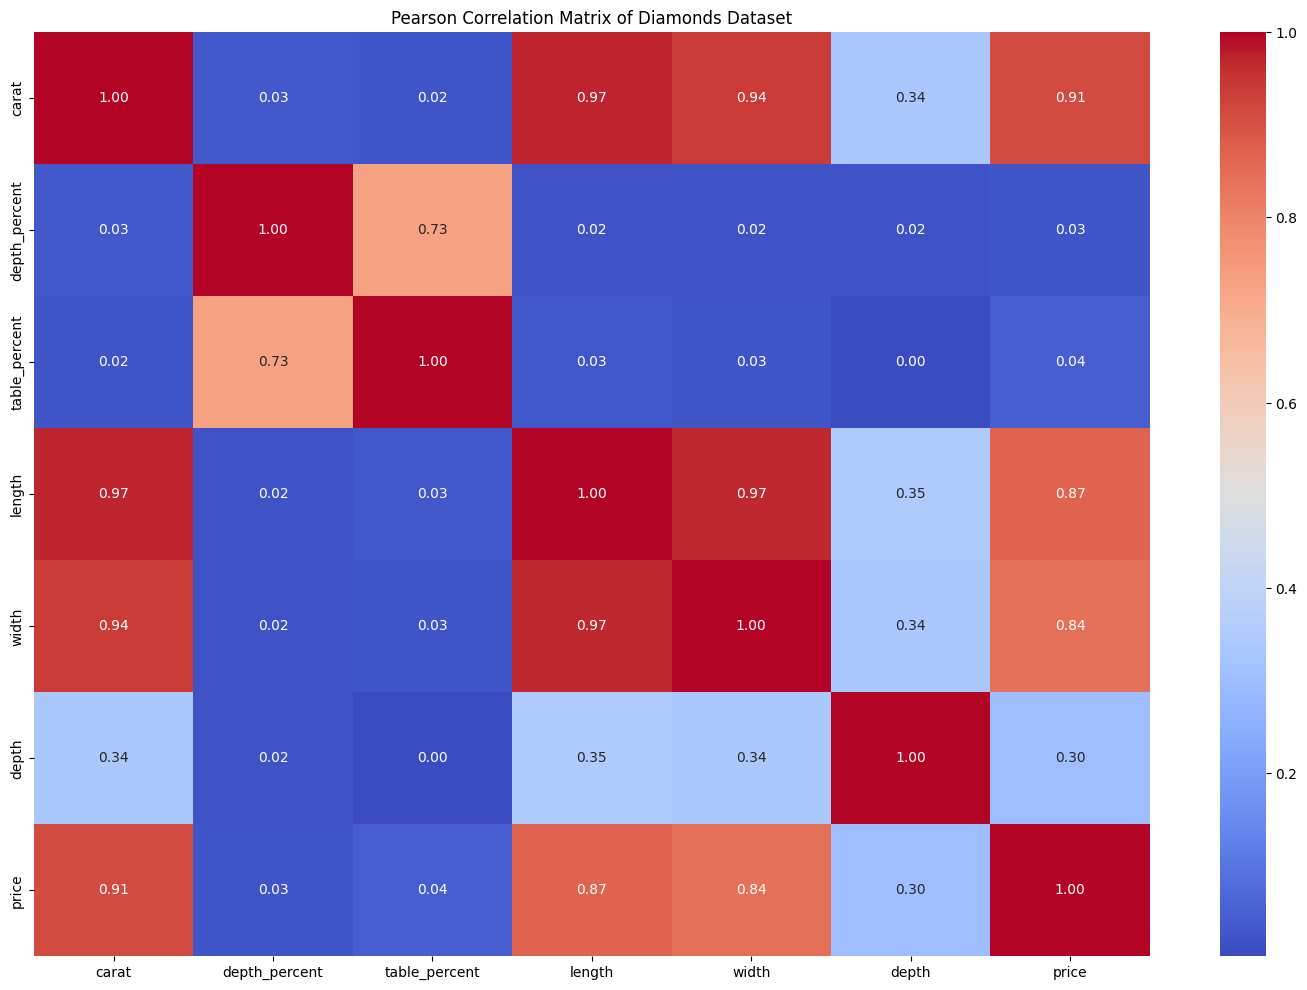

Features with the highest absolute correlation with the target variable (price):
carat            0.913479
length           0.869521
width            0.841887
depth            0.299696
table_percent    0.042453
depth_percent    0.025469
Name: price, dtype: float64


In [ ]:
# Calculate the Pearson correlation matrix
correlation_matrix = diamonds.corr()

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(18,12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Pearson Correlation Matrix of Diamonds Dataset')
plt.show()

# Identify features with the highest absolute correlation with the target variable
target_correlation = correlation_matrix['price'].abs().sort_values(ascending=False)
print("Features with the highest absolute correlation with the target variable (price):")
print(target_correlation[1:])  # Exclude the target variable itself

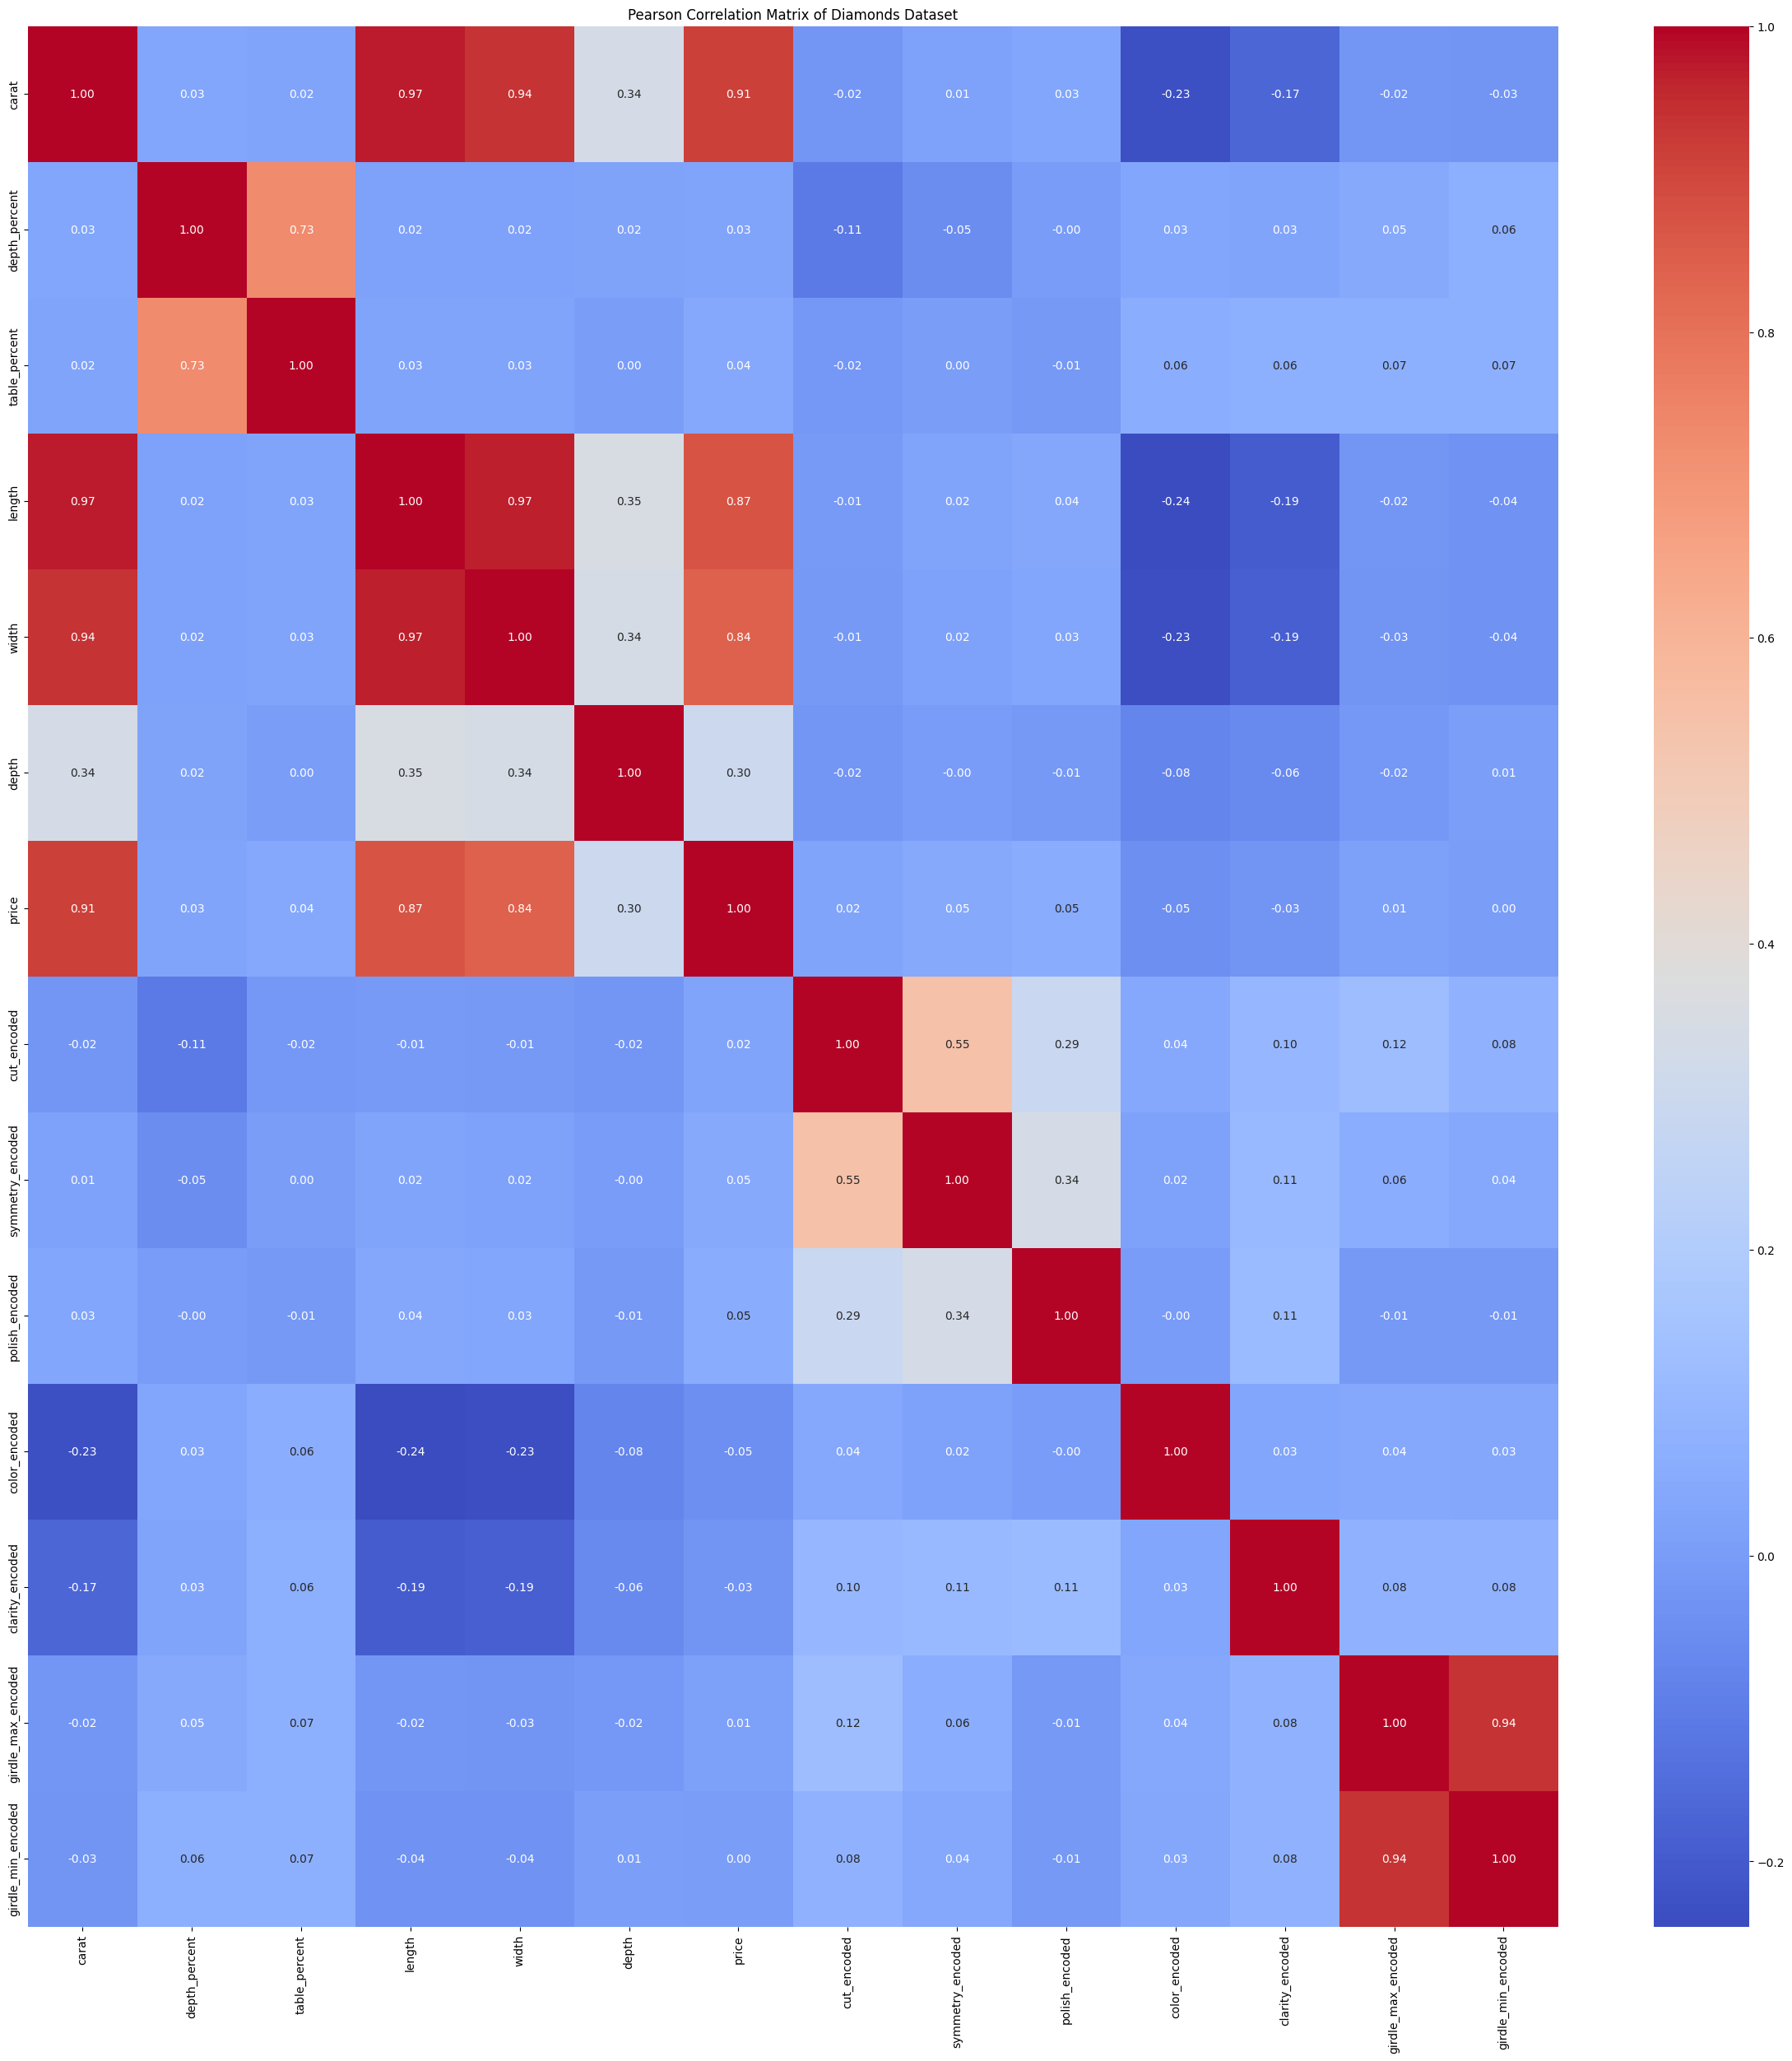

Features with the highest absolute correlation with the target variable (price):
carat                 0.913479
length                0.869521
width                 0.841887
depth                 0.299696
polish_encoded        0.054928
color_encoded         0.047189
symmetry_encoded      0.047149
table_percent         0.042453
clarity_encoded       0.026788
depth_percent         0.025469
cut_encoded           0.024356
girdle_max_encoded    0.013336
girdle_min_encoded    0.000814
Name: price, dtype: float64


In [ ]:
# Calculate the Pearson correlation matrix with all the encoded values
correlation_matrix = finalDiamonds.corr()

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(30, 30))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Pearson Correlation Matrix of Diamonds Dataset')
plt.show()

# Identify features with the highest absolute correlation with the target variable
target_correlation = correlation_matrix['price'].abs().sort_values(ascending=False)
print("Features with the highest absolute correlation with the target variable (price):")
print(target_correlation[1:])  # Exclude the target variable itself

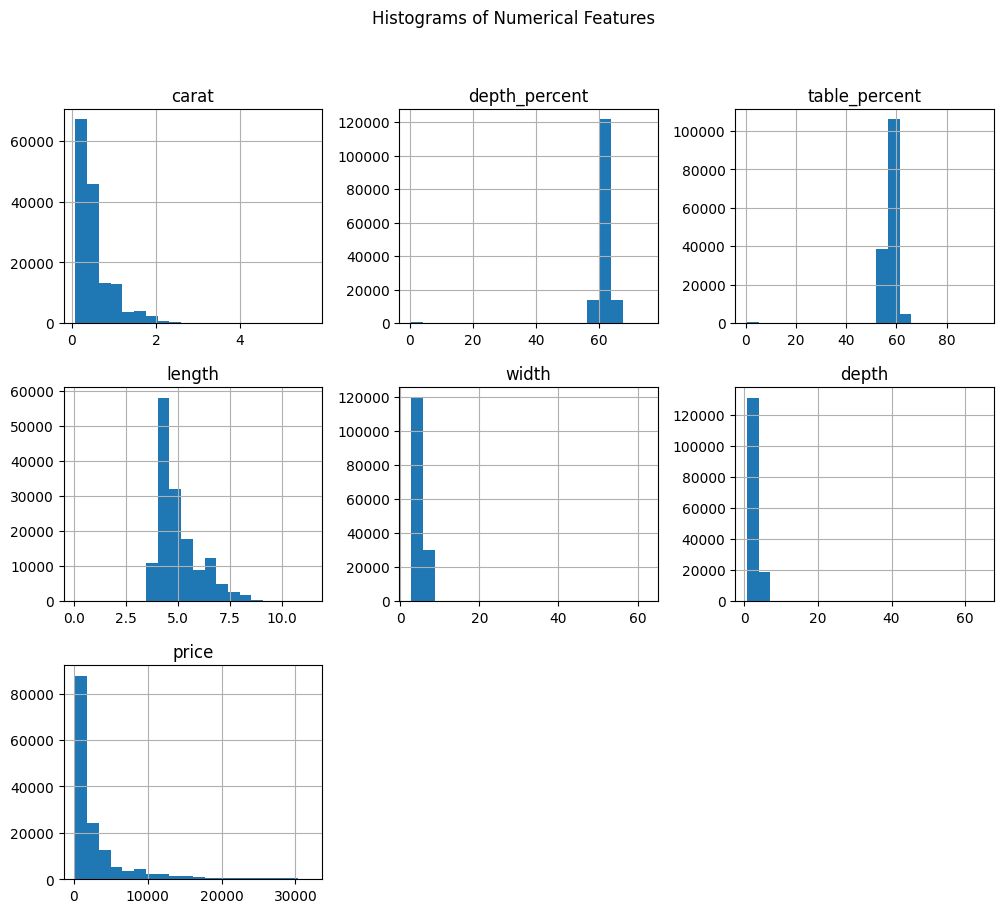

In [ ]:
# Plot histograms of numerical features
numerical_features = diamonds.select_dtypes(include=[np.number])
numerical_features.hist(figsize=(12, 10), bins=20)
plt.suptitle('Histograms of Numerical Features')
plt.show()

In [ ]:
# Check skewness of numerical features
skewness = diamonds.select_dtypes(include=['float64', 'int64']).apply(lambda x: skew(x.dropna()))

#Checking where the skewness is greater than 0.5
highly_skewed_features = skewness[abs(skewness) > 0.5].index
print(highly_skewed_features)
print(skewness)

Index(['carat', 'depth_percent', 'table_percent', 'length', 'width', 'depth',
       'price'],
      dtype='object')
carat             2.331750
depth_percent   -13.559472
table_percent   -11.046453
length            1.283591
width             4.115307
depth            27.493024
price             3.071707
dtype: float64


In [ ]:
#Applying logarithmic transformation on the skewed data
DiamondsCopy = diamonds.copy(deep=True)
# List of numerical columns to transform
numerical_columns = DiamondsCopy.select_dtypes(include=[np.number]).columns

# Apply logarithmic transformation to each numerical column
for column in numerical_columns:
    # Check if the column has negative or zero values
    if (DiamondsCopy[column] <= 0).any():
        # If the column contains non-positive values, add a small constant to make it positive
        DiamondsCopy[column] = np.log1p(DiamondsCopy[column] + 1)  # Use np.log1p to handle zero values
    else:
        DiamondsCopy[column] = np.log(DiamondsCopy[column])

# Visualize the transformed data
print(DiamondsCopy.head())

  color clarity     carat        cut   symmetry     polish  depth_percent  \
0     E    VVS2 -2.407946  Excellent  Very Good  Very Good       4.138361   
1     E    VVS2 -2.407946  Very Good  Very Good  Very Good       4.125520   
2     E    VVS2 -2.407946  Excellent  Very Good  Very Good       4.112512   
3     E    VVS2 -2.407946  Excellent  Very Good  Very Good       4.127134   
4     E    VVS2 -2.407946  Very Good  Very Good  Excellent       4.172848   

   table_percent    length     width     depth girdle_min girdle_max     price  
0       4.077537  1.047319  1.054312  0.582216          M          M  5.298317  
1       4.077537  1.043804  1.061257  0.576613        STK        STK  5.298317  
2       4.077537  1.057790  1.064711  0.570980         TN          M  5.298317  
3       4.077537  1.050822  1.057790  0.576613          M        STK  5.298317  
4       4.069027  1.026042  1.040277  0.598837        STK        STK  5.298317  


In [ ]:
#Applying logarithmic transformation on the skewed data
DiamondsCopy = finalDiamonds.copy(deep=True)
# List of numerical columns to transform
numerical_columns = DiamondsCopy.select_dtypes(include=[np.number]).columns

# Apply logarithmic transformation to each numerical column
for column in numerical_columns:
    # Check if the column has negative or zero values
    if (DiamondsCopy[column] <= 0).any():
        # If the column contains non-positive values, add a small constant to make it positive
        DiamondsCopy[column] = np.log1p(finalDiamonds[column] + 1)  # Use np.log1p to handle zero values
    else:
        DiamondsCopy[column] = np.log(finalDiamonds[column])

# Visualize the transformed data
print(DiamondsCopy.head())

      carat  depth_percent  table_percent    length     width     depth  \
0 -2.407946       4.138361       4.077537  1.047319  1.054312  0.582216   
1 -2.407946       4.125520       4.077537  1.043804  1.061257  0.576613   
2 -2.407946       4.112512       4.077537  1.057790  1.064711  0.570980   
3 -2.407946       4.127134       4.077537  1.050822  1.057790  0.576613   
4 -2.407946       4.172848       4.069027  1.026042  1.040277  0.598837   

      price  cut_encoded  symmetry_encoded  polish_encoded  color_encoded  \
0  5.298317     0.693147               0.0        0.000000       2.197225   
1  5.298317     0.000000               0.0        0.000000       2.197225   
2  5.298317     0.693147               0.0        0.000000       2.197225   
3  5.298317     0.693147               0.0        0.000000       2.197225   
4  5.298317     0.000000               0.0        0.693147       2.197225   

   clarity_encoded  girdle_max_encoded  girdle_min_encoded  
0         2.079442       

In [ ]:
#Checking the skewness after the trasnformation
skewness_after_log_trans = DiamondsCopy.select_dtypes(include=['float64', 'int64']).apply(lambda x: skew(x.dropna()))

skewed_features_after_log_trans = skewness_after_log_trans[abs(skewness_after_log_trans) > 0.5].index
print(skewed_features_after_log_trans)
print(skewness_after_log_trans)

Index(['carat', 'depth_percent', 'table_percent', 'length', 'width', 'depth',
       'price', 'cut_encoded', 'symmetry_encoded', 'polish_encoded',
       'color_encoded', 'clarity_encoded', 'girdle_max_encoded',
       'girdle_min_encoded'],
      dtype='object')
carat                  0.844160
depth_percent        -16.200465
table_percent        -16.015117
length                 0.734470
width                  0.930143
depth                  3.361822
price                  0.897955
cut_encoded           -1.410662
symmetry_encoded      -1.174542
polish_encoded        -2.125702
color_encoded         -1.605959
clarity_encoded       -0.577243
girdle_max_encoded    -0.583845
girdle_min_encoded    -0.563389
dtype: float64


In [ ]:
#Checking the skewness after the trasnformation
skewness_after_log_trans = DiamondsCopy.select_dtypes(include=['float64', 'int64']).apply(lambda x: skew(x.dropna()))

skewed_features_after_log_trans = skewness_after_log_trans[abs(skewness_after_log_trans) > 0.5].index
print(skewed_features_after_log_trans)
print(skewness_after_log_trans)

Index(['carat', 'depth_percent', 'table_percent', 'length', 'width', 'depth',
       'price', 'cut_encoded', 'symmetry_encoded', 'polish_encoded',
       'color_encoded', 'clarity_encoded', 'girdle_max_encoded',
       'girdle_min_encoded'],
      dtype='object')
carat                  0.844160
depth_percent        -16.200465
table_percent        -16.015117
length                 0.734470
width                  0.930143
depth                  3.361822
price                  0.897955
cut_encoded           -1.410662
symmetry_encoded      -1.174542
polish_encoded        -2.125702
color_encoded         -1.605959
clarity_encoded       -0.577243
girdle_max_encoded    -0.583845
girdle_min_encoded    -0.563389
dtype: float64


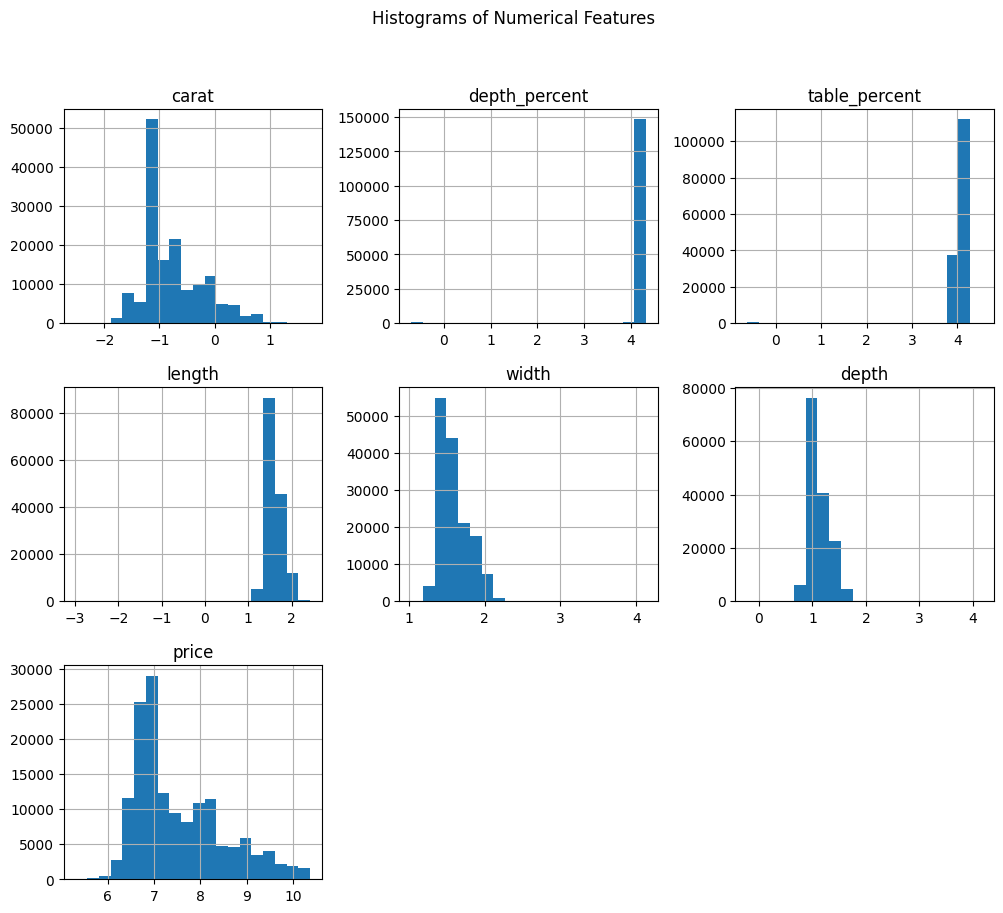

In [ ]:
# Plot histograms of numerical features after applying log trasnformation on the skewed data
numerical_features = DiamondsCopy.select_dtypes(include=[np.number])
numerical_features.hist(figsize=(12, 10), bins=20)
plt.suptitle('Histograms of Numerical Features')
plt.show()

cut


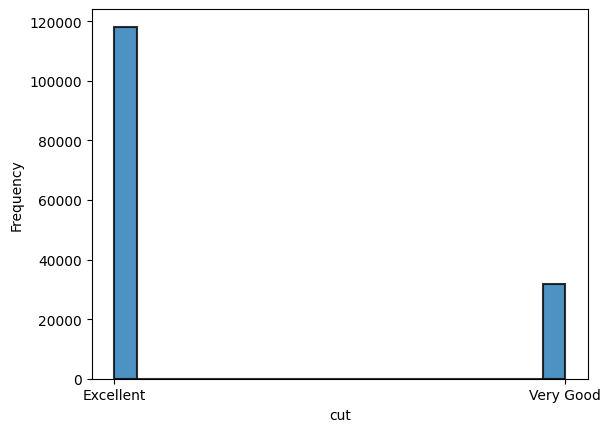

color


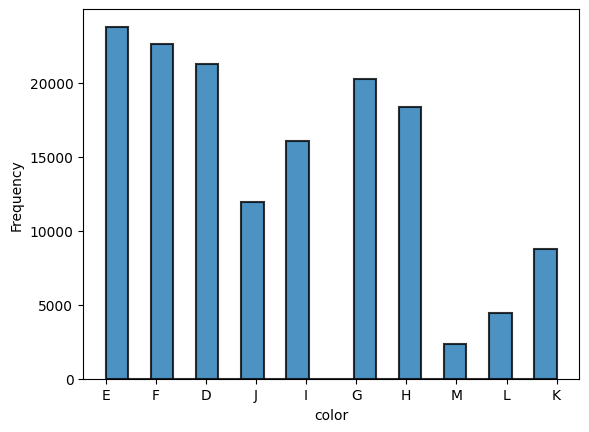

clarity


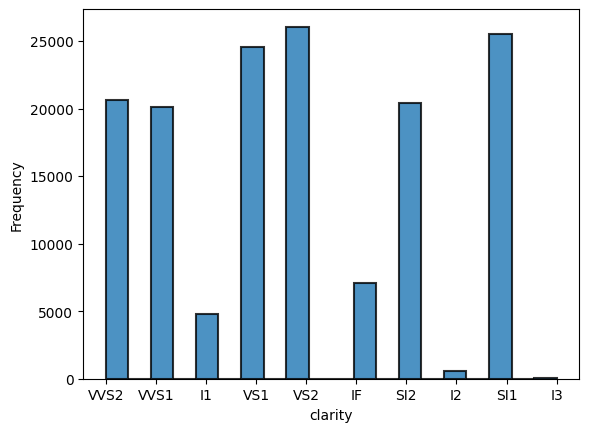

price


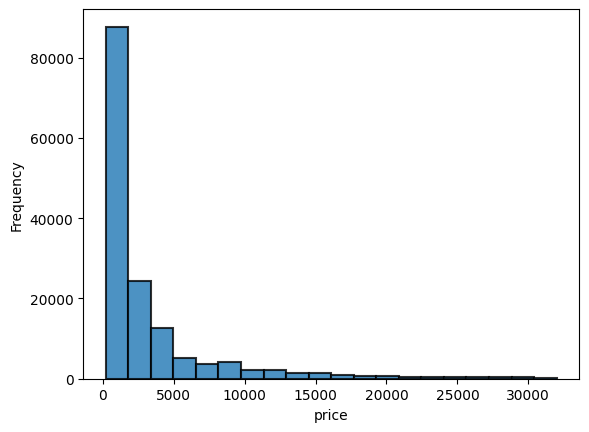

In [ ]:
numerical_features = ['cut','color','clarity','price']
for i in numerical_features:
    print(i)
    plt.hist(diamondsCopy[i],bins=20, edgecolor='k',linewidth=1.5, alpha=0.8)
    plt.xlabel(i)
    plt.ylabel('Frequency')
    plt.show()

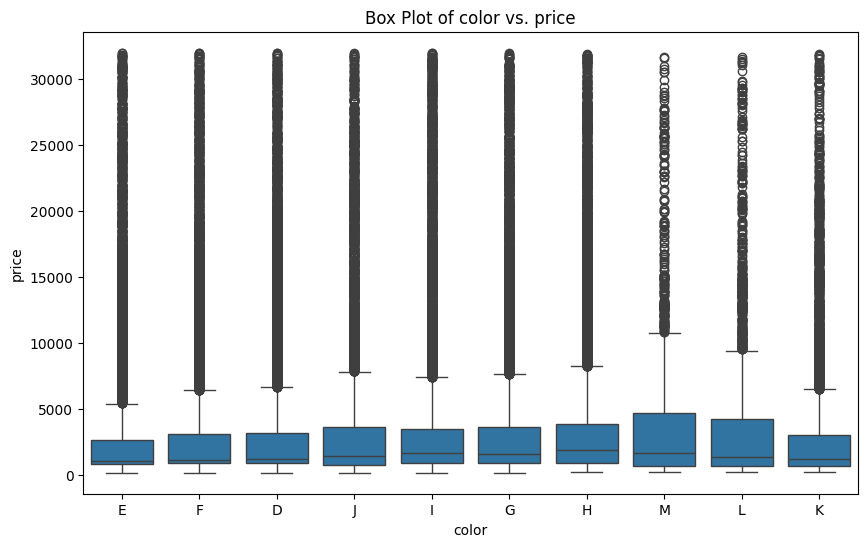

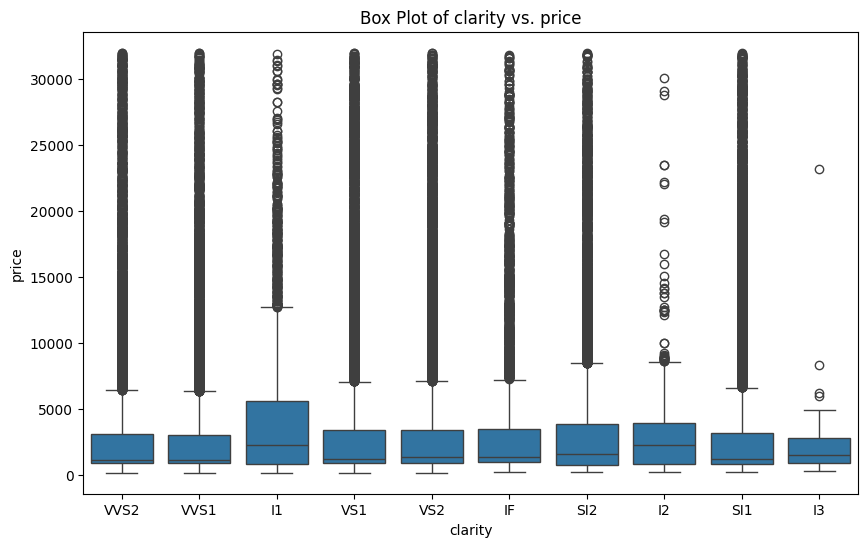

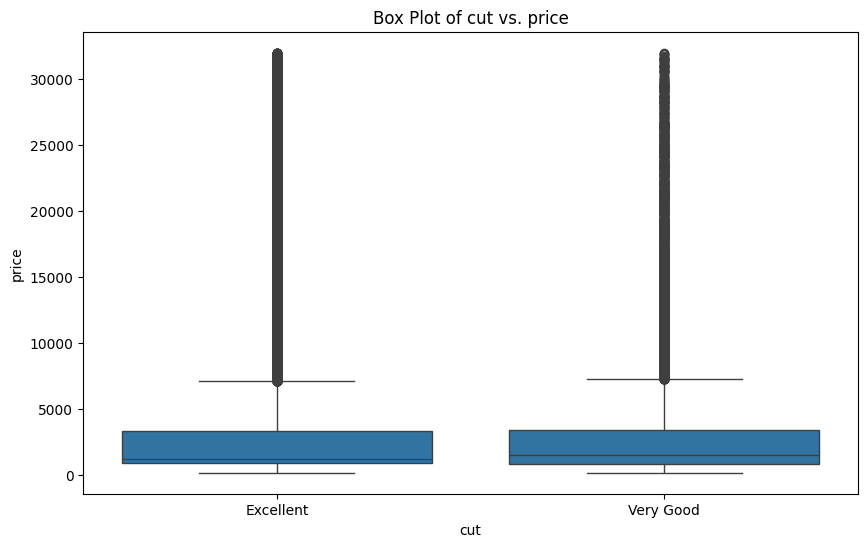

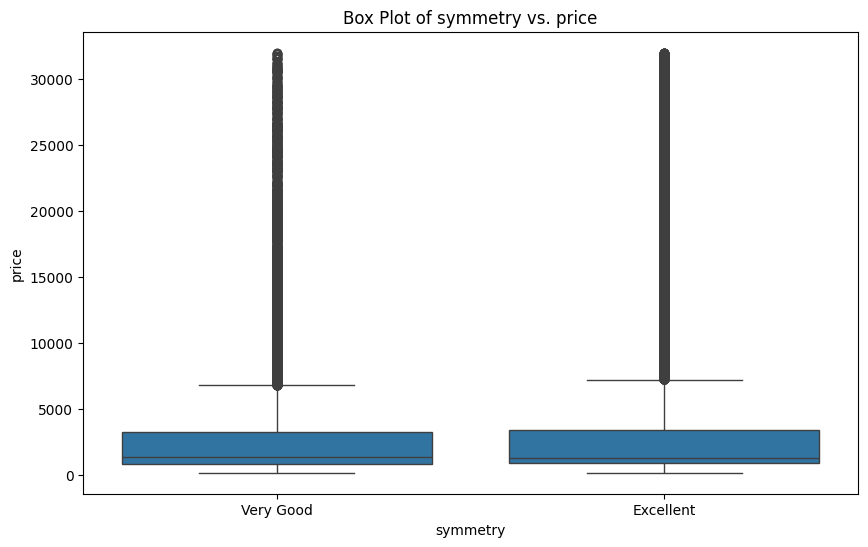

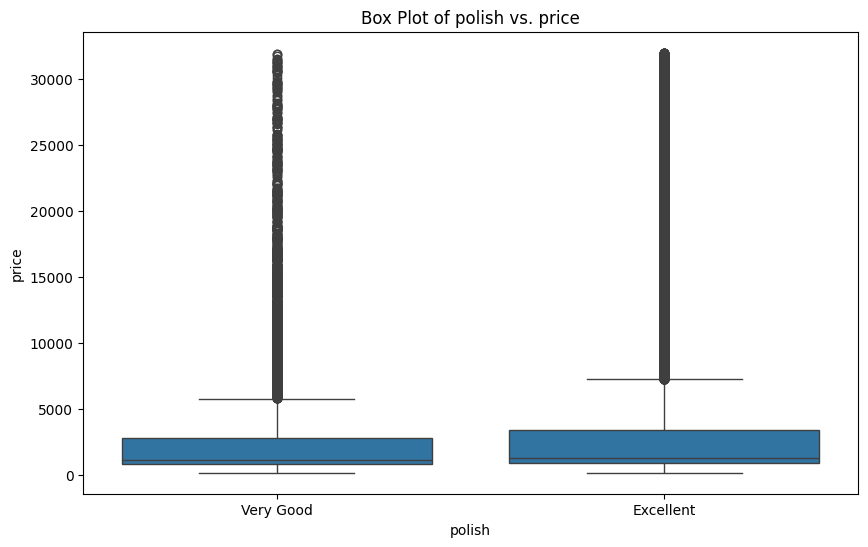

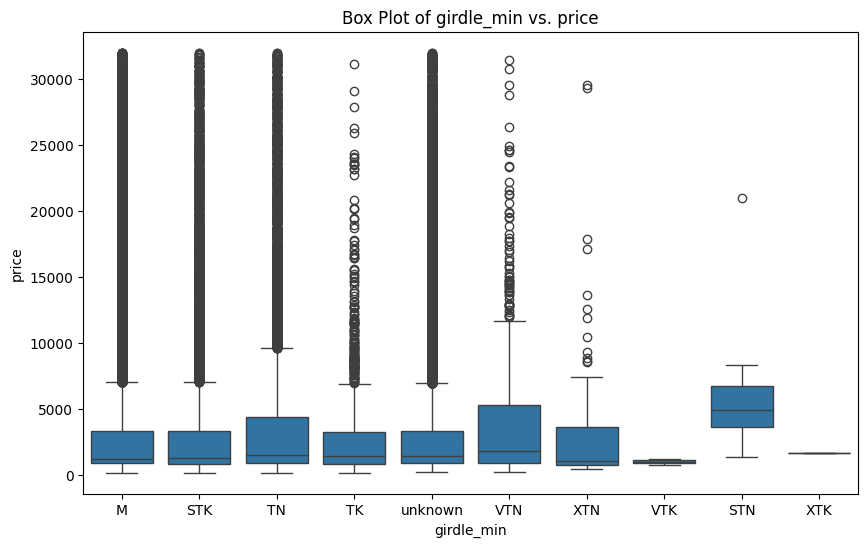

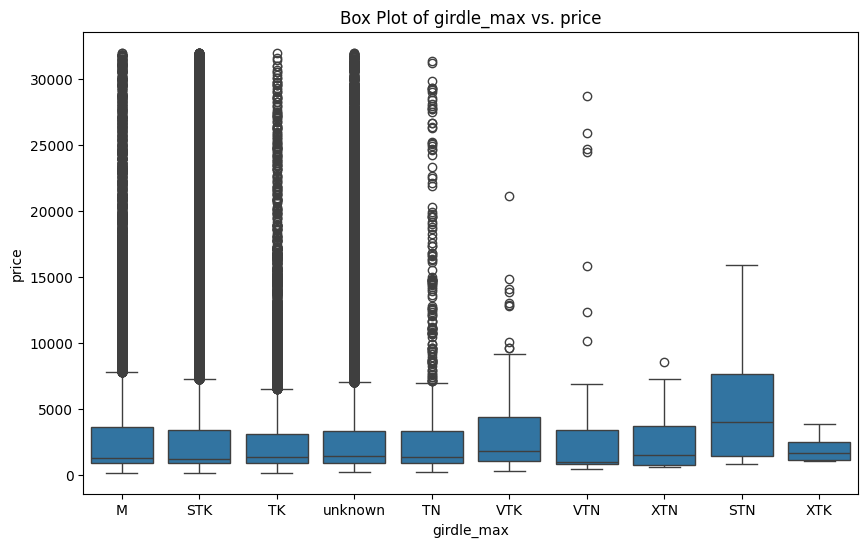

In [ ]:
# Identify categorical features in the dataset
categorical_features = diamonds.select_dtypes(include=['object'])

# Define the target variable (assuming it's 'price')
target_variable = 'price'

# Create box plots of categorical features vs. target variable
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=feature, y=target_variable, data=diamonds)
    plt.title(f'Box Plot of {feature} vs. {target_variable}')
    plt.show()

<Axes: >

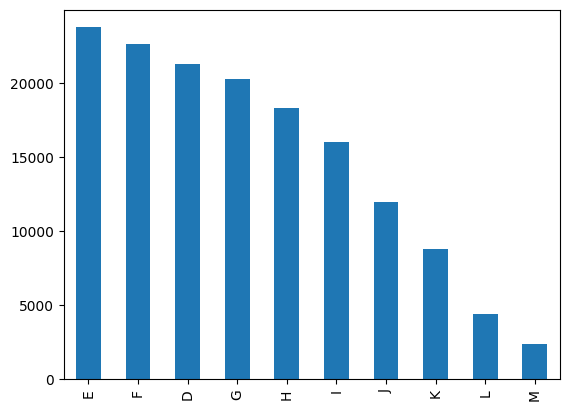

In [ ]:
#Finding the count for color
diamonds['color'].value_counts().plot(kind='bar')

<Axes: >

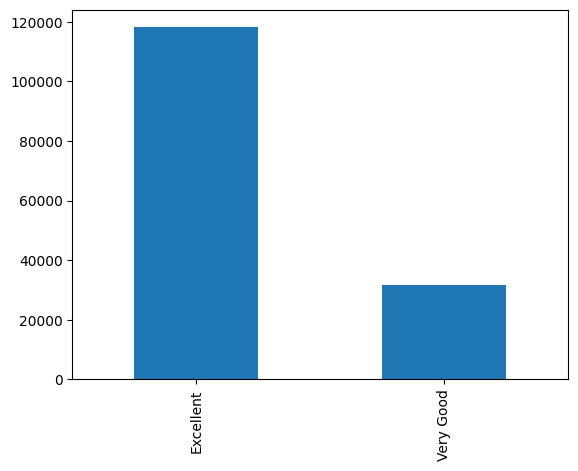

In [ ]:
#Finding the count for cut
diamonds['cut'].value_counts().plot(kind='bar')

<Axes: >

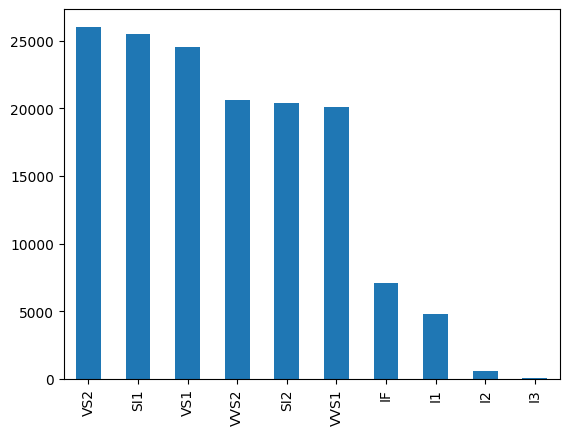

In [ ]:
#Finding the count for clarity
diamonds['clarity'].value_counts().plot(kind='bar')

QUESTION 1
* Question 1.1 - Plot a heatmap of the Pearson correlation matrix of the dataset columns. Report which features have the highest absolute correlation with the target variable. In the context of either dataset, describe what the correlation patterns suggest.

> Refer to the heatmap above. The value of Pearson coefficient correlation ranges from -1 to 1. -1 indicates a negative correlation. This means that an increase in one variable will lead to a decrease in the other variable. Whereas a positive value implies that an increase or decrease in one variable will lead to an increase or decrease in the other variable respectively. For the diamond characteristic dataset, we can see the correlations below:\
Features with the highest absolute correlation with the target variable (price):\
carat                 0.913479\
length                0.869521\
width                 0.841887\
depth                 0.299696\
polish_encoded        0.054928\
color_encoded         0.047189\
symmetry_encoded      0.047149\
table_percent         0.042453\
clarity_encoded       0.026788\
depth_percent         0.025469\
cut_encoded           0.024356\
girdle_max_encoded    0.013336\
girdle_min_encoded    0.000814\
We can see that carat has the highest correlation with the target variable price. Length and width also matter since they too have a high correlation. This means that carat along with length and width are the most informative while figuring out the price of a diamond. This aligns with the market pattern that the size and the carats of the diamond are very critical factors affecting the price of the diamond.

* Question 1.2 - Plot the histogram of numerical features. What preprocessing can be done if the distribution of a feature has high skewness?

> Refer to the histograms above.\
The skewness of the features is as below:\
carat             2.331750\
depth_percent   -13.559472\
table_percent   -11.046453\
length            1.283591\
width             4.115307\
depth            27.493024\
price             3.071707\
We can see the features that have a high skewness. This means that there are expensive outliers. When a feature exhibits high skewness in its distribution, meaning it is not symmetrically distributed around the mean, several preprocessing techniques can be applied to mitigate this skewness. Preprocessing steps like standardization can be done so that extreme values do not cause harm to the robustness of the model. Another common technique used is logarithmic transformation. This can help reduce the magnitude of extreme values and bring the distribution closer to a normal distribution. It mitigates the impact of highly skewed values while preserving the relative difference between smaller values. \
The skewness after logarithmic transformation is:\
carat             0.844160\
depth_percent   -16.200465\
table_percent   -16.015117\
length            0.734470\
width             0.930143\
depth             3.361822\
price             0.897955\
Refer to the histogram above for the features after logarithmic transformation

* Question 1.3 - Construct and inspect the box plot of categorical features vs target variable. What do you find?

> Refer to the box plots above. The box plot is an efficient way to capture information about the distribution of the features. The middle box displays the interquartile range which is the data points that lie within the 25th percentile to 75th percentile in the dataset. The extremes show the minimum and maximum quantities. From the box plot of cut, we can see that the median for very good is higher. For clarity, we can see that I1 had a higher price than IF. In reality, we expect a converse relation. Same is the case for color. From the clarity plot we can see that some categories are easily predictable by the model. For color, we see that E,F and D are highly skewed.

* Question 1.4 - For the Diamonds dataset, plot the counts by color, cut and clarity.

> Refer to the graphs above.


# **Question 2**

In [ ]:
#Checking the columns
finalDiamonds.columns

Index(['carat', 'depth_percent', 'table_percent', 'length', 'width', 'depth',
       'price', 'cut_encoded', 'symmetry_encoded', 'polish_encoded',
       'color_encoded', 'clarity_encoded', 'girdle_max_encoded',
       'girdle_min_encoded'],
      dtype='object')

In [ ]:
# Calculate variance of each feature
variance = finalDiamonds.var()

print("Variance of features:")
print(variance)

Variance of features:
carat                 1.607563e-01
depth_percent         1.581350e+01
table_percent         1.564101e+01
length                1.020743e+00
width                 1.103568e+00
depth                 3.626439e+00
price                 2.217831e+07
cut_encoded           1.669470e-01
symmetry_encoded      1.858905e-01
polish_encoded        1.173908e-01
color_encoded         5.552167e+00
clarity_encoded       3.531377e+00
girdle_max_encoded    1.834651e+01
girdle_min_encoded    2.062345e+01
dtype: float64


In [ ]:
# Calculate variance of each feature
variance = diamonds.var()

print("Variance of features:")
print(variance)

Variance of features:
carat            1.607563e-01
depth_percent    1.581350e+01
table_percent    1.564101e+01
length           1.020743e+00
width            1.103568e+00
depth            3.626439e+00
price            2.217831e+07
dtype: float64


<ipython-input-23-a8c2a66d2143>:2: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  variance = diamonds.var()


In [ ]:
DiamondsCopy.columns

Index(['carat', 'depth_percent', 'table_percent', 'length', 'width', 'depth',
       'price', 'cut_encoded', 'symmetry_encoded', 'polish_encoded',
       'color_encoded', 'clarity_encoded', 'girdle_max_encoded',
       'girdle_min_encoded'],
      dtype='object')

In [ ]:
#Splitting the skewed data
X_skewed = DiamondsCopy.drop(columns=['price'])  # Feature columns
Y_skewed = DiamondsCopy['price']  # Target variable

In [ ]:
#Standardizing the feature columns of the skewed data
diam_scale = StandardScaler()
X_Scaled_skewed = diam_scale.fit_transform(X_skewed)
print(X_Scaled_skewed)
# Convert the standardized feature columns back to a DataFrame
X_Scaled_skewed_df = pd.DataFrame(X_Scaled_skewed, columns=X_skewed.columns)

[[-2.92285185  0.09723771  0.13273985 ...  0.8225998   0.87133873
   0.82526349]
 [-2.92285185  0.05202386  0.13273985 ...  0.8225998   0.76375418
   0.71988357]
 [-2.92285185  0.00622185  0.13273985 ...  0.8225998   0.87133873
   0.33420264]
 ...
 [ 2.97719711  0.01197979  0.19261038 ...  1.19841226 -1.34406863
  -1.34474548]
 [ 3.0132733  -0.11095968  0.30941471 ...  0.8225998   0.76375418
   0.82526349]
 [ 2.10108641  0.10845103 -0.05315691 ...  1.19841226  0.76375418
   0.33420264]]


In [ ]:
#Storing the target variable in Y and remaining in X
X = finalDiamonds.drop(columns=['price'])  # Feature columns
Y = finalDiamonds['price']  # Target variable

In [ ]:
#Standardizing the feature columns
diam_scale = StandardScaler()
X_Scaled = diam_scale.fit_transform(X)
print(X_Scaled)
# Convert the standardized feature columns back to a DataFrame
X_Scaled_df = pd.DataFrame(X_Scaled, columns=X.columns)

[[-1.15710628  0.21586559  0.34511928 ...  0.81198065  1.00594171
   0.88948906]
 [-1.15710628  0.01468897  0.34511928 ...  0.81198065  0.77247516
   0.66928728]
 [-1.15710628 -0.18648765  0.34511928 ...  0.81198065  1.00594171
   0.00868195]
 ...
 [ 4.72901819 -0.16134057  0.59797282 ...  1.34412493 -1.32872376
  -1.31252872]
 [ 4.85372422 -0.68942919  1.10367989 ...  0.81198065  0.77247516
   0.88948906]
 [ 2.35960368  0.26615974 -0.41344134 ...  1.34412493  0.77247516
   0.00868195]]


In [ ]:
# Perform feature selection using mutual information
mi_scores = mutual_info_regression(X_Scaled, Y)

# Perform feature selection using F scores and get p-values
f_scores, p_values = f_regression(X_Scaled, Y)

# Display mutual information, F scores, and p-values for each feature
feature_scores_df = pd.DataFrame({'Feature': X.columns, 'MI Score': mi_scores, 'F Score': f_scores})
print("Feature Scores:")
print(feature_scores_df)

# Features with the lowest mutual information scores
lowest_mi_features = feature_scores_df.nsmallest(2, 'MI Score')['Feature'].tolist()
print("\nTwo Features with the lowest mutual information scores:")
print(lowest_mi_features)

# Fatures with the lowest f score
lowest_f_score_features = feature_scores_df.nsmallest(2, 'F Score')['Feature'].tolist()
print("\nTwo Features with the lowest F score:")
print(lowest_f_score_features)

Feature Scores:
               Feature  MI Score        F Score
0                carat  1.371552  755380.195809
1        depth_percent  0.044695      97.274940
2        table_percent  0.023415     270.590496
3               length  1.191610  464517.682462
4                width  1.204129  364744.610195
5                depth  1.157733   14789.226399
6          cut_encoded  0.025857      88.958031
7     symmetry_encoded  0.025778     333.901556
8       polish_encoded  0.009937     453.535242
9        color_encoded  0.182139     334.472819
10     clarity_encoded  0.171903     107.621796
11  girdle_max_encoded  0.037241      26.659077
12  girdle_min_encoded  0.025050       0.099306

Two Features with the lowest mutual information scores:
['polish_encoded', 'table_percent']

Two Features with the lowest F score:
['girdle_min_encoded', 'girdle_max_encoded']


In [ ]:
# # Define the MI and F score thresholds for feature selection. Only keeping features with high correlation with price
mutual_info_threshold = 0.1  # Threshold for MI score
#f_score_threshold = 1000  # Example threshold for F score
#Since the F scores are too varied, we are considering the values with a high F score

# # Filter features based on MI score thresholds
features_greater_than_threshold = feature_scores_df[(feature_scores_df['MI Score'] > mutual_info_threshold)]

# Extract selected feature names
feature_names = features_greater_than_threshold['Feature'].tolist()

# Filter X_scaled_df to keep only the selected features
X_Reduced_df = X_Scaled_df[feature_names]

#Our final reduced and scaled df which will be used for the further calcuations
X_Reduced_df.head()

,carat,length,width,depth,color_encoded,clarity_encoded
0,-1.157106,-2.146391,-2.078247,-0.730430,0.916097,0.811981
1,-1.157106,-2.156289,-2.059209,-0.735681,0.916097,0.811981
2,-1.157106,-2.116697,-2.049690,-0.740932,0.916097,0.811981
3,-1.157106,-2.136493,-2.068728,-0.735681,0.916097,0.811981
4,-1.157106,-2.205778,-2.116324,-0.714676,0.916097,0.811981


In [ ]:
# Extract selected feature names of the skewed data
feature_names = ['carat','length','width','depth','color_encoded','clarity_encoded']

# Filter X_scaled_df to keep only the selected features
X_Reduced_skewed_df = X_Scaled_skewed_df[feature_names]

#Our final reduced and scaled df which will be used for the further calcuations
X_Reduced_skewed_df.head()

,carat,length,width,depth,color_encoded,clarity_encoded
0,-2.922852,-2.950765,-2.950708,-2.604366,0.784325,0.8226
1,-2.922852,-2.969701,-2.913277,-2.631284,0.784325,0.8226
2,-2.922852,-2.894354,-2.894659,-2.658355,0.784325,0.8226
3,-2.922852,-2.931896,-2.931960,-2.631284,0.784325,0.8226
4,-2.922852,-3.065392,-3.026358,-2.524502,0.784325,0.8226


In [ ]:
#Splitting the scaled reduced dataset
X_train, X_test, Y_train, Y_test = train_test_split(X_Reduced_df, Y, test_size=0.2, random_state=42)

QUESTION 2
* Question 2.1 - Standardize feature columns and prepare them for training.
> Standard Scaler was used to standardize the feature columns.
* Question 2.2 - You may use these functions to select features that yield better regression re- sults (especially in the classical models). Describe how this step qualitatively affects the performance of your models in terms of test RMSE. Is it true for all model types? Also list two features for either dataset that has the lowest MI w.r.t to the target.

>Feature selection is very important for regression models as it selects the important features and only use those. Both mutual information (MI) regression and F regression are commonly used techniques for feature selection. MI Regression checks how dependent two random variables are i.e how dependent the feature and target variable are. In our case the target variable is price. The higher the value means there is more dependency. This means that it contributes highly to the target variable. So if we have a high value, it means that this feature affects the price significantly. By selecting the values with higher MI regression, we are reducing our dataset to only the important features which in turn improves the performance of the model. F scores measure the significance of the improvement in the model's performance when adding new variables (features). The higher the value, the more significant the variable. This means that adding this particular feature with a high value will improve the performance of the model. By selecting features with higher F scores, we can prioritize features that contribute the most to the model's performance.
Using these methods help improve model performance specially regression models by reducing overfitting and using only the important features. The model can better capture the underlying patterns leading to improved generalization performance and lower test root mean squared error (RMSE). The effectiveness of these depends on the dataset and the regression model used.  Linear regression models benefit drastically since they are sensitive to multicollinearity and overfitting. But, more complex models like tree based algorithms inherently do feature selection and hence using MI regression or F score will not make a lot of difference.

>The two features with the lowest MI w.r.t the target are:
['polish_encoded', 'table_percent'] an MI of 0.009602 and 0.023415 respectively.

>The two features with the lowest F score w.r.t the target are:
['girdle_min_encoded', 'girdle_max_encoded'] with values 0.099306 and 26.659077 respectively.




# **Question 4**

**Unscaled Data**

In [ ]:
#Finding the best alpha values for unscaled data
# Define the range of alpha values to search
alphas = np.logspace(-4, 4, 9)  # Example range of alpha values from 0.0001 to 10000

# Create parameter grid for Lasso and Ridge regression
param_grid = {'alpha': alphas}

# Instantiate Lasso and Ridge models
lasso_model = Lasso()
ridge_model = Ridge()

# Perform grid search cross-validation for Lasso
lasso_grid_search = GridSearchCV(estimator=lasso_model, param_grid=param_grid, cv=10, scoring='neg_mean_squared_error')
lasso_grid_search.fit(X, Y)

# Perform grid search cross-validation for Ridge
ridge_grid_search = GridSearchCV(estimator=ridge_model, param_grid=param_grid, cv=10, scoring='neg_mean_squared_error')
ridge_grid_search.fit(X, Y)

# Get the best alpha values
best_alpha_lasso_unscaled = lasso_grid_search.best_params_['alpha']
best_alpha_ridge_unscaled = ridge_grid_search.best_params_['alpha']

print("Best alpha for Lasso for Unscaled Data:", best_alpha_lasso_unscaled)
print("Best alpha for Ridge for Unscaled Data::", best_alpha_ridge_unscaled)

Best alpha for Lasso for Unscaled Data: 0.01
Best alpha for Ridge for Unscaled Data:: 0.0001


In [ ]:
# Define the models using the best alpha values found above for unscaled data
# Instantiate the linear regression models
ols_model = LinearRegression()
lasso_model = Lasso(alpha=best_alpha_lasso_unscaled)  # Using best alpha value for Lasso
ridge_model = Ridge(alpha=best_alpha_ridge_unscaled)  # Using best alpha value for Ridge

# Perform 10-fold cross-validation for OLS model
ols_scores = cross_val_score(ols_model, X, Y, cv=10, scoring='neg_mean_squared_error')
ols_rmse = np.sqrt(-ols_scores)

# Perform 10-fold cross-validation for Lasso model
lasso_scores = cross_val_score(lasso_model, X, Y, cv=10, scoring='neg_mean_squared_error')
lasso_rmse = np.sqrt(-lasso_scores)

# Perform 10-fold cross-validation for Ridge model
ridge_scores = cross_val_score(ridge_model, X, Y, cv=10, scoring='neg_mean_squared_error')
ridge_rmse = np.sqrt(-ridge_scores)

# Calculate average RMSE scores
ols_avg_rmse_unscaled = np.mean(ols_rmse)
lasso_avg_rmse_unscaled = np.mean(lasso_rmse)
ridge_avg_rmse_unscaled = np.mean(ridge_rmse)

# Print average RMSE scores
print("Average RMSE for Ordinary Least Squares (OLS) for Unscaled Data:", ols_avg_rmse_unscaled)
print("Average RMSE for Lasso Regression for Unscaled Data:", lasso_avg_rmse_unscaled)
print("Average RMSE for Ridge Regression for Unscaled Data:", ridge_avg_rmse_unscaled)

Average RMSE for Ordinary Least Squares (OLS) for Unscaled Data: 1571.035361861907
Average RMSE for Lasso Regression for Unscaled Data: 1570.88201356099
Average RMSE for Ridge Regression for Unscaled Data: 1571.0354586551564


**Scaled Data**

In [ ]:
#Finding the best alpha values for scaled data
# Define the range of alpha values to search
alphas = np.logspace(-4, 4, 9)  # Example range of alpha values from 0.0001 to 10000

# Create parameter grid for Lasso and Ridge regression
param_grid = {'alpha': alphas}

# Instantiate Lasso and Ridge models
lasso_model = Lasso()
ridge_model = Ridge()

# Perform grid search cross-validation for Lasso
lasso_grid_search = GridSearchCV(estimator=lasso_model, param_grid=param_grid, cv=10, scoring='neg_mean_squared_error')
lasso_grid_search.fit(X_Scaled_df, Y)

# Perform grid search cross-validation for Ridge
ridge_grid_search = GridSearchCV(estimator=ridge_model, param_grid=param_grid, cv=10, scoring='neg_mean_squared_error')
ridge_grid_search.fit(X_Scaled_df, Y)

# Get the best alpha values
best_alpha_lasso_scaled = lasso_grid_search.best_params_['alpha']
best_alpha_ridge_scaled = ridge_grid_search.best_params_['alpha']

print("Best alpha for Lasso for Scaled Data:", best_alpha_lasso_scaled)
print("Best alpha for Ridge for Scaled Data::", best_alpha_ridge_scaled)

Best alpha for Lasso for Scaled Data: 0.1
Best alpha for Ridge for Scaled Data:: 0.0001


In [ ]:
# Define the models using the best alpha values found above for scaled data
# Instantiate the linear regression models
ols_model = LinearRegression()
lasso_model = Lasso(alpha=best_alpha_lasso_scaled)  # Using best alpha value for Lasso
ridge_model = Ridge(alpha=best_alpha_ridge_scaled)  # Using best alpha value for Ridge

# Perform 10-fold cross-validation for OLS model
ols_scores = cross_val_score(ols_model, X_Scaled_df, Y, cv=10, scoring='neg_mean_squared_error')
ols_rmse = np.sqrt(-ols_scores)

# Perform 10-fold cross-validation for Lasso model
lasso_scores = cross_val_score(lasso_model, X_Scaled_df, Y, cv=10, scoring='neg_mean_squared_error')
lasso_rmse = np.sqrt(-lasso_scores)

# Perform 10-fold cross-validation for Ridge model
ridge_scores = cross_val_score(ridge_model, X_Scaled_df, Y, cv=10, scoring='neg_mean_squared_error')
ridge_rmse = np.sqrt(-ridge_scores)

# Calculate average RMSE scores
ols_avg_rmse_scaled = np.mean(ols_rmse)
lasso_avg_rmse_scaled = np.mean(lasso_rmse)
ridge_avg_rmse_scaled = np.mean(ridge_rmse)

# Print average RMSE scores
print("Average RMSE for Ordinary Least Squares (OLS) for Scaled Data:", ols_avg_rmse_scaled)
print("Average RMSE for Lasso Regression for Scaled Data:", lasso_avg_rmse_scaled)
print("Average RMSE for Ridge Regression for Scaled Data:", ridge_avg_rmse_scaled)

Average RMSE for Ordinary Least Squares (OLS) for Scaled Data: 1571.035361861908
Average RMSE for Lasso Regression for Scaled Data: 1570.8951241421228
Average RMSE for Ridge Regression for Scaled Data: 1571.0353771863192


**Scaled Reduced Data**

In [ ]:
#Finding the best alpha values for scaled reduced data
# Define the range of alpha values to search
alphas = np.logspace(-4, 4, 9)  # Example range of alpha values from 0.0001 to 10000

# Create parameter grid for Lasso and Ridge regression
param_grid = {'alpha': alphas}

# Instantiate Lasso and Ridge models
lasso_model = Lasso()
ridge_model = Ridge()

# Perform grid search cross-validation for Lasso
lasso_grid_search = GridSearchCV(estimator=lasso_model, param_grid=param_grid, cv=10, scoring='neg_mean_squared_error')
lasso_grid_search.fit(X_Reduced_df, Y)

# Perform grid search cross-validation for Ridge
ridge_grid_search = GridSearchCV(estimator=ridge_model, param_grid=param_grid, cv=10, scoring='neg_mean_squared_error')
ridge_grid_search.fit(X_Reduced_df, Y)

# Get the best alpha values
best_alpha_lasso_reduced = lasso_grid_search.best_params_['alpha']
best_alpha_ridge_reduced = ridge_grid_search.best_params_['alpha']

print("Best alpha for Lasso for Reduced Scaled Data:", best_alpha_lasso_reduced)
print("Best alpha for Ridge for Reduced Scaled Data::", best_alpha_ridge_reduced)

Best alpha for Lasso for Reduced Scaled Data: 0.1
Best alpha for Ridge for Reduced Scaled Data:: 0.0001


In [ ]:
# Define the models using the best alpha values found above for scaled data
# Instantiate the linear regression models
ols_model = LinearRegression()
lasso_model = Lasso(alpha=best_alpha_lasso_reduced)  # Using best alpha value for Lasso
ridge_model = Ridge(alpha=best_alpha_ridge_reduced)  # Using best alpha value for Ridge

# Perform 10-fold cross-validation for OLS model
ols_scores = cross_val_score(ols_model, X_Reduced_df, Y, cv=10, scoring='neg_mean_squared_error')
ols_rmse = np.sqrt(-ols_scores)

# Perform 10-fold cross-validation for Lasso model
lasso_scores = cross_val_score(lasso_model, X_Reduced_df, Y, cv=10, scoring='neg_mean_squared_error')
lasso_rmse = np.sqrt(-lasso_scores)

# Perform 10-fold cross-validation for Ridge model
ridge_scores = cross_val_score(ridge_model, X_Reduced_df, Y, cv=10, scoring='neg_mean_squared_error')
ridge_rmse = np.sqrt(-ridge_scores)

# Calculate average RMSE scores
ols_avg_rmse_reduced = np.mean(ols_rmse)
lasso_avg_rmse_reduced = np.mean(lasso_rmse)
ridge_avg_rmse_reduced = np.mean(ridge_rmse)

# Print average RMSE scores
print("Average RMSE for Ordinary Least Squares (OLS) for Reduced Scaled Data:", ols_avg_rmse_reduced)
print("Average RMSE for Lasso Regression for Reduced Scaled Data:", lasso_avg_rmse_reduced)
print("Average RMSE for Ridge Regression for Reduced Scaled Data:", ridge_avg_rmse_reduced)

Average RMSE for Ordinary Least Squares (OLS) for Reduced Scaled Data: 1581.83183864438
Average RMSE for Lasso Regression for Reduced Scaled Data: 1581.6691554265262
Average RMSE for Ridge Regression for Reduced Scaled Data: 1581.8318524986157


In [ ]:
#Changing different parameters for Lasso regression and trying to see if we get a lower RMSE on reduced scaled data
# Define the pipeline with feature scaling and Lasso regression
pipeline = Pipeline([
    ('lasso', Lasso())             # Lasso regression
])

# Define a grid of hyperparameters to search
param_grid = {
    'lasso__alpha': [0.001, 0.01, 0.1, 1, 10],  # Try different alpha values
    'lasso__tol': [1e-4, 1e-3, 1e-2],           # Try different tolerance values
    'lasso__max_iter': [1000, 2000, 5000],       # Try different maximum iteration values
    'lasso__selection': ['cyclic', 'random']    # Try different feature selection methods
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=10, scoring='neg_mean_squared_error')
grid_search.fit(X_Reduced_df, Y)

# Get the best hyperparameters and RMSE score
best_params = grid_search.best_params_
best_rmse = (-grid_search.best_score_) ** 0.5

print("Best Hyperparameters:", best_params)
print("Best RMSE:", best_rmse)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.265e+09, tolerance: 3.175e+08
  model = cd_fast.enet_coordinate_descent(


Best Hyperparameters: {'lasso__alpha': 1, 'lasso__max_iter': 1000, 'lasso__selection': 'cyclic', 'lasso__tol': 0.01}
Best RMSE: 2436.8905223962215


In [ ]:
#Changing different parameters for Ridge regression and trying to see if we get a lower RMSE on reduced scaled data
# Define the pipeline with feature scaling and Ridge regression
pipeline = Pipeline([
    ('ridge', Ridge())             # Ridge regression
])

# Define a grid of hyperparameters to search
param_grid = {
    'ridge__alpha': [0.001, 0.01, 0.1, 1, 10],      # Try different alpha values
    'ridge__solver': ['auto', 'svd', 'cholesky',    # Try different solvers
                      'lsqr', 'sparse_cg', 'sag', 'saga'],
    'ridge__tol': [1e-4, 1e-3, 1e-2]                # Try different tolerance values
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=10, scoring='neg_mean_squared_error')
grid_search.fit(X_Reduced_df, Y)

# Get the best hyperparameters and RMSE score
best_params = grid_search.best_params_
best_rmse = (-grid_search.best_score_) ** 0.5

print("Best Hyperparameters:", best_params)
print("Best RMSE:", best_rmse)

Best Hyperparameters: {'ridge__alpha': 10, 'ridge__solver': 'sag', 'ridge__tol': 0.01}
Best RMSE: 2455.886231633592


**Scaled Reduced Skewed Data**

In [ ]:
#Finding the best alpha values for scaled reduced skewed data
# Define the range of alpha values to search
alphas = np.logspace(-4, 4, 9)  # Range of alpha values from 0.0001 to 10000

# Create parameter grid for Lasso and Ridge regression
param_grid = {'alpha': alphas}

# Instantiate Lasso and Ridge models
lasso_model = Lasso()
ridge_model = Ridge()

# Perform grid search cross-validation for Lasso
lasso_grid_search = GridSearchCV(estimator=lasso_model, param_grid=param_grid, cv=10, scoring='neg_mean_squared_error')
lasso_grid_search.fit(X_Reduced_skewed_df, Y_skewed)

# Perform grid search cross-validation for Ridge
ridge_grid_search = GridSearchCV(estimator=ridge_model, param_grid=param_grid, cv=10, scoring='neg_mean_squared_error')
ridge_grid_search.fit(X_Reduced_skewed_df, Y_skewed)

# Get the best alpha values
best_alpha_lasso_reduced = lasso_grid_search.best_params_['alpha']
best_alpha_ridge_reduced = ridge_grid_search.best_params_['alpha']

print("Best alpha for Lasso for Reduced Skewed Scaled Data:", best_alpha_lasso_reduced)
print("Best alpha for Ridge for Reduced Skewed Scaled Data::", best_alpha_ridge_reduced)

Best alpha for Lasso for Reduced Skewed Scaled Data: 0.0001
Best alpha for Ridge for Reduced Skewed Scaled Data:: 0.0001


In [ ]:
# Define the models using the best alpha values found above for reduced shewed scaled data
# Instantiate the linear regression models
ols_model = LinearRegression()
lasso_model = Lasso(alpha=best_alpha_lasso_reduced)  # Using best alpha value for Lasso
ridge_model = Ridge(alpha=best_alpha_ridge_reduced)  # Using best alpha value for Ridge

# Perform 10-fold cross-validation for OLS model
ols_scores = cross_val_score(ols_model, X_Reduced_skewed_df, Y_skewed, cv=10, scoring='neg_mean_squared_error')
ols_rmse = np.sqrt(-ols_scores)

# Perform 10-fold cross-validation for Lasso model
lasso_scores = cross_val_score(lasso_model, X_Reduced_skewed_df, Y_skewed, cv=10, scoring='neg_mean_squared_error')
lasso_rmse = np.sqrt(-lasso_scores)

# Perform 10-fold cross-validation for Ridge model
ridge_scores = cross_val_score(ridge_model, X_Reduced_skewed_df, Y_skewed, cv=10, scoring='neg_mean_squared_error')
ridge_rmse = np.sqrt(-ridge_scores)

# Calculate average RMSE scores
ols_avg_rmse_reduced = np.mean(ols_rmse)
lasso_avg_rmse_reduced = np.mean(lasso_rmse)
ridge_avg_rmse_reduced = np.mean(ridge_rmse)

# Print average RMSE scores
print("Average RMSE for Ordinary Least Squares (OLS) for Reduced Skewed Scaled Data:", ols_avg_rmse_reduced)
print("Average RMSE for Lasso Regression for Reduced Skewed Scaled Data:", lasso_avg_rmse_reduced)
print("Average RMSE for Ridge Regression for Reduced Skewed Scaled Data:", ridge_avg_rmse_reduced)

Average RMSE for Ordinary Least Squares (OLS) for Reduced Skewed Scaled Data: 0.15584804291480306
Average RMSE for Lasso Regression for Reduced Skewed Scaled Data: 0.1558603267153913
Average RMSE for Ridge Regression for Reduced Skewed Scaled Data: 0.15584804319490161


**Train-Test Split Data**

In [ ]:
# Define alpha values to search
alphas = np.logspace(-4, 4, 9)  # Example alpha values from 10^-4 to 10^4

# Define parameter grid for Lasso and Ridge regression
lasso_param_grid = {'alpha': alphas}
ridge_param_grid = {'alpha': alphas}

# Perform grid search with cross-validation to find the best alpha for Lasso and Ridge models
lasso_grid_search = GridSearchCV(Lasso(), lasso_param_grid, cv=10, scoring='neg_mean_squared_error')
ridge_grid_search = GridSearchCV(Ridge(), ridge_param_grid, cv=10, scoring='neg_mean_squared_error')

# Fit the grid search objects to the training data
lasso_grid_search.fit(X_train, Y_train)
ridge_grid_search.fit(X_train, Y_train)

# Get the best alpha values for Lasso and Ridge models
best_alpha_lasso = lasso_grid_search.best_params_['alpha']
best_alpha_ridge = ridge_grid_search.best_params_['alpha']

# Print the best alpha values
print("Best alpha for Lasso:", best_alpha_lasso)
print("Best alpha for Ridge:", best_alpha_ridge)

Best alpha for Lasso: 0.1
Best alpha for Ridge: 0.0001


In [ ]:
# Train Lasso and Ridge regression models with the best alpha values
lasso_model = Lasso(alpha=best_alpha_lasso)
ridge_model = Ridge(alpha=best_alpha_ridge)

# Perform cross-validation to estimate model performance
lasso_cv_scores = cross_val_score(lasso_model, X_train, Y_train, cv=10, scoring='neg_mean_squared_error')
ridge_cv_scores = cross_val_score(ridge_model, X_train, Y_train, cv=10, scoring='neg_mean_squared_error')

# Convert negative MSE scores to positive values and calculate mean
lasso_cv_rmse = np.sqrt(-lasso_cv_scores.mean())
ridge_cv_rmse = np.sqrt(-ridge_cv_scores.mean())

# Train Lasso and Ridge regression models on the entire training dataset
lasso_model.fit(X_train, Y_train)
ridge_model.fit(X_train, Y_train)

# Evaluate models on the test set
lasso_test_preds = lasso_model.predict(X_test)
ridge_test_preds = ridge_model.predict(X_test)

# Calculate root mean squared error (RMSE) on the test set
lasso_test_rmse = np.sqrt(mean_squared_error(Y_test, lasso_test_preds))
ridge_test_rmse = np.sqrt(mean_squared_error(Y_test, ridge_test_preds))

# Print the RMSE values
print("Lasso CV RMSE:", lasso_cv_rmse)
print("Ridge CV RMSE:", ridge_cv_rmse)
print("Lasso Test RMSE:", lasso_test_rmse)
print("Ridge Test RMSE:", ridge_test_rmse)

Lasso CV RMSE: 1619.500087777625
Ridge CV RMSE: 1619.512659888272
Lasso Test RMSE: 1613.7549246183992
Ridge Test RMSE: 1613.7530377250657


**P-Values**

In [ ]:
lm_fit = sm.OLS(Y, sm.add_constant(X_Reduced_df)).fit()
print(lm_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                 1.867e+05
Date:                Sat, 16 Mar 2024   Prob (F-statistic):               0.00
Time:                        01:14:31   Log-Likelihood:            -1.3200e+06
No. Observations:              149871   AIC:                         2.640e+06
Df Residuals:                  149864   BIC:                         2.640e+06
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            3303.9155      4.179    7

In [ ]:
#Finding p values for reduced scaled data
lm_fit.pvalues

const              0.000000e+00
carat              0.000000e+00
length             0.000000e+00
width              4.511933e-03
depth              7.563643e-12
color_encoded      0.000000e+00
clarity_encoded    0.000000e+00
dtype: float64

In [ ]:
lm_fit = sm.OLS(Y, sm.add_constant(X)).fit()
print(lm_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                 8.739e+04
Date:                Sat, 16 Mar 2024   Prob (F-statistic):               0.00
Time:                        01:25:07   Log-Likelihood:            -1.3191e+06
No. Observations:              149871   AIC:                         2.638e+06
Df Residuals:                  149857   BIC:                         2.638e+06
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -3469.3727    101

In [ ]:
#Finding p values for unscaled data
lm_fit.pvalues

const                 6.151068e-257
carat                  0.000000e+00
depth_percent         6.861467e-103
table_percent          1.741110e-57
length                 0.000000e+00
width                  2.717473e-02
depth                  6.961519e-05
cut_encoded            2.208329e-63
symmetry_encoded       9.644875e-07
polish_encoded         3.486273e-03
color_encoded          0.000000e+00
clarity_encoded        0.000000e+00
girdle_max_encoded     7.008595e-73
girdle_min_encoded     1.358578e-42
dtype: float64

QUESTION 4

What is the objective function? Train three models: (a) ordinary least squares (linear regression without regularization), (b) Lasso and (c) Ridge regression, and answer the following questions.

> In linear regression, the objective function is to minimize the difference between the observed target values and the values predicted. This means that we are reducing the mean squared error between the target value and the predicted value.

The objective functions are as below:
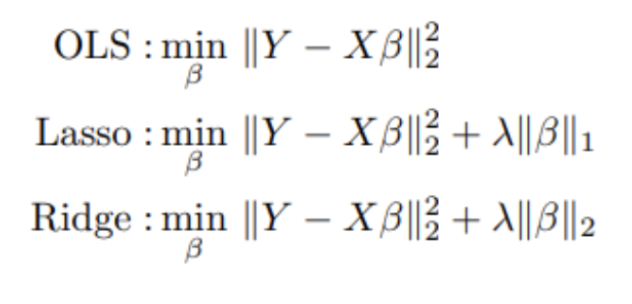

> We can see the RMSEs obtained as below:

> Unscaled Data:\
Average RMSE for Ordinary Least Squares (OLS) for Unscaled Data: 1571.035361861907\
Average RMSE for Lasso Regression for Unscaled Data: 1570.88201356099 (Best alpha for Lasso for Unscaled Data: 0.01)\
Average RMSE for Ridge Regression for Unscaled Data: 1571.0354586551564 (Best alpha for Ridge for Unscaled Data:: 0.0001)

>Scaled Data:\
Average RMSE for Ordinary Least Squares (OLS) for Scaled Data: 1571.035361861908\
Average RMSE for Lasso Regression for Scaled Data: 1570.8951241421228 (Best alpha for Lasso for Scaled Data: 0.1)\
Average RMSE for Ridge Regression for Scaled Data: 1571.0353771863192 (Best alpha for Ridge for Scaled Data:: 0.0001)

> Scaled Reduced Data:\
Average RMSE for Ordinary Least Squares (OLS) for Reduced Scaled Data: 1581.83183864438\
Average RMSE for Lasso Regression for Reduced Scaled Data: 1581.6691554265262 (Best alpha for Lasso for Reduced Scaled Data: 0.1)\
Average RMSE for Ridge Regression for Reduced Scaled Data: 1581.8318524986157 (Best alpha for Ridge for Reduced Scaled Data:: 0.0001)

> Scaled Reduced Skewed Data:\
Average RMSE for Ordinary Least Squares (OLS) for Reduced Skewed Scaled Data: 0.15584804291480306\
Average RMSE for Lasso Regression for Reduced Skewed Scaled Data: 0.1558603267153913 (Best alpha for Lasso for Reduced Scaled Data: 0.0001)\
Average RMSE for Ridge Regression for Reduced Skewed Scaled Data: 0.15584804319490161 (Best alpha for Ridge for Reduced Scaled Data:: 0.0001)

> Scaled Train-Test Split Data:\
Lasso CV RMSE: 1619.500087777625 (Best alpha for Lasso: 0.1)\
Ridge CV RMSE: 1619.512659888272 (​​Best alpha for Ridge: 0.0001)\
Lasso Test RMSE: 1613.7549246183992 (Best alpha for Lasso: 0.1)\
Ridge Test RMSE: 1613.7530377250657 (Best alpha for Ridge: 0.0001)\
We can see that scaling and skewing features improves the performance of the model.

* Question 4.1 - Explain how each regularization scheme affects the learned parameter set.

> Lasso Regression is linear regression with L1 regularization. Whereas Ridge Regression is linear regression with L2 regularization. These prevent overfitting by adding a penalty term to the loss function.\
For Lasso Regression, the penalty term is proportional to the absolute values of the coefficients of the features. Lasso Regularization tends to produce sparse solutions, meaning it forces some of the coefficients of the features to be exactly zero. This makes it useful for models that need feature selection or while dealing with high dimensional data that has a lot of irrelevant features. By setting some values to zero, Lasso selects those features that have a high correlation to the target variable. This helps improve the mdoel performance by focusing on the important features. The shrinkage performed prevents overfitting of the model by reducing the variance. The amount of regularization in Lasso is controlled by a hyperparameter called the regularization parameter (lambda or alpha). Increasing the regularization parameter increases the amount of regularization, which in turn increases the level of sparsity in the learned parameter set. However, higher regularization also increases bias while reducing variance. Therefore, there is a trade-off between bias and variance that needs to be carefully balanced when tuning the regularization parameter.\
For Ridge Regularization, the penalty term is proportional to the squared magnitudes of the coefficients of the features. One of the key effects of Ridge regularization is that it shrinks the coefficients of the features towards zero. Unlike Lasso regularization, which can set coefficients exactly to zero, Ridge regularization only reduces the magnitude of the coefficients. This also prevents overfitting. Ridge regularization does not include sparsity. Ridge regression tends to retain all features in the model, even those that are less important for predicting the target variable. This can be advantageous when all features are potentially relevant and excluding any feature could lead to loss of information. Ridge regularization also has alpha which controls the regularization. Ridge regularization is particularly effective when dealing with multicollinear features, meaning features that are highly correlated with each other.\
Hence L2 regularization i.e Ridge regularization is useful for shrinkage purposes whereas L1 regularization i.e Lasso Regularization is useful for feature selection.


* Question 4.2 Report your choice of the best regularization scheme along with the optimal penalty parameter and explain how you computed it.

> We tried regression on unscaled data, scaled data, scaled reduced data and scaled reduced skewed data. Multiple values of alpha were tried to check which gives the lowest RMSE. The values for all the experiments can be found above.\
We can see for the scaled reduced data with the top 6 features, we received the following RMSEs:\
Average RMSE for Ordinary Least Squares (OLS) for Reduced Scaled Data: 1581.83183864438\
Average RMSE for Lasso Regression for Reduced Scaled Data: 1581.6691554265262 (Best alpha for Lasso for Reduced Scaled Data: 0.1)\
Average RMSE for Ridge Regression for Reduced Scaled Data: 1581.8318524986157 (Best alpha for Ridge for Reduced Scaled Data:: 0.0001)\
The various values of alpha tried were from 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000. \
We found Lasso Regression to perform the best with a value of alpha as 0.1 and the Average RMSE as 1581.6691554265262.


* Question 4.3 - Does feature standardization play a role in improving the model performance (in the cases with ridge regularization)? Justify your answer.

> Yes, feature standardization plays an important role in improving the model performance. Ridge regularization penalizes large coefficients in the model by adding a term to the objective function that is proportional to the square of the magnitude of the coefficients. This penalty term aims to prevent overfitting by reducing the influence of individual features on the model's predictions. However this cna be affected by the scaling of features. Features with different scales have different impacts. One with large scales have large coefficients after regularization and vice versa. This can lead to biased model estimates. Standardization ensures that all the features contribute equally to the regularization. Standardization also improves the stability and interpretability of the learned coefficients. In summary, by ensuring that all features are on the same scale, standardization helps to improve the effectiveness of ridge regularization by promoting more stable and interpretable model estimates. This, in turn, can lead to improved model performance, better generalization to unseen data, and enhanced interpretability of the model's predictions. The improvement in model performance with standardized features is reflected in a larger difference in the RMSE values obtained when using scaled features compared to unscaled features. This is why feature standardization is very important.\
We can see in our case that standardization did not make much of a difference in the values of the RMSE. Feature scaling might be important depending on the type of regression and how the dataset is. If it is not a standard normally distributed data, it will not make much of a difference on the RMSE or might even increase the RMSE.

* Question 4.4 - Some linear regression packages return p-values for different features. What is the meaning of these p-values and how can you infer the most significant features? A qualitative reasoning is sufficient.

> In linear regression, p-values associated with each feature indicate the statistical significance of that feature's contribution to explaining the variation in the target variable. A low p-value (typically below a significance level, such as 0.05) suggests that the null hypothesis can be rejected, indicating that the corresponding feature is statistically significant in predicting the target variable. In other words, a low p-value suggests that there is strong evidence that the feature has a non-zero coefficient and contributes significantly to the model. Conversely, a high p-value suggests that there is insufficient evidence to reject the null hypothesis, indicating that the corresponding feature may not be statistically significant in predicting the target variable. Therefore, when interpreting p-values in linear regression, features with low p-values are considered more significant and are likely to have a stronger influence on the target variable. These features are typically retained in the model, while features with high p-values may be considered for removal if they do not contribute significantly to the model's predictive power.\
The p values obtained for the reduced scaled dataset are:\
const              0.000000e+00\
carat              0.000000e+00\
length             0.000000e+00\
width              4.511933e-03\
depth              7.563643e-12\
color_encoded      0.000000e+00\
clarity_encoded    0.000000e+00

# **Question 5**

**Reduced Scaled Data**

In [ ]:
# Define the maximum degree of polynomial
max_degree = 6

# Generate polynomial features up to the maximum degree
poly = PolynomialFeatures(degree=max_degree, include_bias=False)
X_poly = poly.fit_transform(X_Reduced_df)  # X is your feature matrix

# Define a pipeline for polynomial regression with ridge regularization
pipeline = make_pipeline(StandardScaler(), Ridge())

# Define hyperparameter grid for alpha (regularization strength)
param_grid = {'ridge__alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

# Perform Ridge regression with cross-validation to find the optimal alpha
ridge_model = GridSearchCV(pipeline, param_grid, cv=10, scoring='neg_mean_squared_error')
ridge_model.fit(X_poly, Y)

# Get the best ridge regression model from the grid search
best_model_ridge = ridge_model.best_estimator_.named_steps['ridge']

# Access the alpha value used in the best Ridge model
optimal_alpha = best_model_ridge.alpha

# Evaluate the best model
ridge_rmse = np.sqrt(-ridge_model.best_score_)

# Print the optimal alpha value
print("Optimal alpha:", optimal_alpha)

# Print the average RMSE across folds
print("Average RMSE:", np.mean(ridge_rmse))

Optimal alpha: 100
Average RMSE: 17853.290655116616


In [ ]:
# Get the polynomial features
poly_features = poly.get_feature_names_out(X_Reduced_df.columns)
print("Polynomial Features:",poly_features)

# Combine the coefficients with the corresponding feature names
coefficients = pd.Series(best_model_ridge.coef_, index=poly_features)

print(coefficients)

Polynomial Features: ['carat' 'length' 'width' 'depth' 'color_encoded' 'clarity_encoded'
 'carat^2' 'carat length' 'carat width' 'carat depth'
 'carat color_encoded' 'carat clarity_encoded' 'length^2' 'length width'
 'length depth' 'length color_encoded' 'length clarity_encoded' 'width^2'
 'width depth' 'width color_encoded' 'width clarity_encoded' 'depth^2'
 'depth color_encoded' 'depth clarity_encoded' 'color_encoded^2'
 'color_encoded clarity_encoded' 'clarity_encoded^2' 'carat^3'
 'carat^2 length' 'carat^2 width' 'carat^2 depth' 'carat^2 color_encoded'
 'carat^2 clarity_encoded' 'carat length^2' 'carat length width'
 'carat length depth' 'carat length color_encoded'
 'carat length clarity_encoded' 'carat width^2' 'carat width depth'
 'carat width color_encoded' 'carat width clarity_encoded' 'carat depth^2'
 'carat depth color_encoded' 'carat depth clarity_encoded'
 'carat color_encoded^2' 'carat color_encoded clarity_encoded'
 'carat clarity_encoded^2' 'length^3' 'length^2 width' '

In [ ]:
# Sort the coefficients by their absolute values
sorted_coefficients = coefficients.abs().sort_values(ascending=False)

# Select the top N features (e.g., top 10)
top_features = sorted_coefficients.head(10)

# Print the top N features and their coefficients
print("Top 10 most salient features:")
print(top_features)

Top 10 most salient features:
carat                                    1738.093028
length                                    922.766495
carat length                              629.209188
length^2                                  551.691905
carat^2                                   545.248260
width                                     544.845613
depth                                     446.095877
carat width                               374.664500
carat length^2                            344.355816
carat^4 color_encoded clarity_encoded     343.970888
dtype: float64


In [ ]:
# Define the range of polynomial degrees to search over
degrees = [1, 2, 3, 4, 5, 6]

# Initialize lists to store the results
avg_rmse_scores = []

for degree in degrees:
    # Generate polynomial features up to the specified degree
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    X_poly = poly.fit_transform(X_Reduced_df)  # X is your feature matrix

    # Define a pipeline for polynomial regression with ridge regularization
    pipeline = make_pipeline(StandardScaler(), Ridge())

    # Define hyperparameter grid for alpha (regularization strength)
    param_grid = {'ridge__alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

    # Perform Ridge regression with cross-validation to find the optimal alpha
    ridge_model = GridSearchCV(pipeline, param_grid, cv=10, scoring='neg_mean_squared_error')
    ridge_model.fit(X_poly, Y)

    # Get the best ridge regression model from the grid search
    best_model_ridge = ridge_model.best_estimator_.named_steps['ridge']

    # Access the alpha value used in the best Ridge model
    optimal_alpha = best_model_ridge.alpha

    # Evaluate the best model
    ridge_rmse = np.sqrt(-ridge_model.best_score_)

    avg_rmse_scores.append(ridge_rmse)

# Find the index of the degree with the lowest average RMSE
best_degree_index = np.argmin(avg_rmse_scores)
best_degree = degrees[best_degree_index]

# Print the optimal degree and its corresponding average RMSE
print("Optimal degree:", best_degree)
print("Average RMSE for optimal degree:", avg_rmse_scores[best_degree_index])

Optimal degree: 2
Average RMSE for optimal degree: 2061.794194438115


In [ ]:
# Generate polynomial features up to the maximum degree
poly = PolynomialFeatures(degree=best_degree, include_bias=False)
X_poly = poly.fit_transform(X_Reduced_df)  # X is your feature matrix

# Define a pipeline for polynomial regression with ridge regularization
pipeline = make_pipeline(StandardScaler(), Ridge())

# Define hyperparameter grid for alpha (regularization strength)
param_grid = {'ridge__alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

# Perform Ridge regression with cross-validation to find the optimal alpha
ridge_model = GridSearchCV(pipeline, param_grid, cv=10, scoring='neg_mean_squared_error')
ridge_model.fit(X_poly, Y)

# Get the best ridge regression model from the grid search
best_model_ridge = ridge_model.best_estimator_.named_steps['ridge']

# Access the alpha value used in the best Ridge model
optimal_alpha = best_model_ridge.alpha

# Evaluate the best model
ridge_rmse = np.sqrt(-ridge_model.best_score_)

# Print the optimal alpha value
print("Optimal alpha:", optimal_alpha)

# Print the average RMSE across folds
print("Average RMSE:", np.mean(ridge_rmse))

Optimal alpha: 100
Average RMSE: 2061.794194438115


In [ ]:
# Get the polynomial features of the best degree
poly_features = poly.get_feature_names_out(X_Reduced_df.columns)
print("Polynomial Features:",poly_features)

# Combine the coefficients with the corresponding feature names
coefficients = pd.Series(best_model_ridge.coef_, index=poly_features)

print(coefficients)

Polynomial Features: ['carat' 'length' 'width' 'depth' 'color_encoded' 'clarity_encoded'
 'carat^2' 'carat length' 'carat width' 'carat depth'
 'carat color_encoded' 'carat clarity_encoded' 'length^2' 'length width'
 'length depth' 'length color_encoded' 'length clarity_encoded' 'width^2'
 'width depth' 'width color_encoded' 'width clarity_encoded' 'depth^2'
 'depth color_encoded' 'depth clarity_encoded' 'color_encoded^2'
 'color_encoded clarity_encoded' 'clarity_encoded^2']
carat                            2892.768465
length                            291.059290
width                             274.352037
depth                             106.325337
color_encoded                     665.976914
clarity_encoded                   549.439143
carat^2                         -1829.722688
carat length                     2247.841194
carat width                      1781.562526
carat depth                        74.580067
carat color_encoded              2143.772803
carat clarity_encoded    

In [ ]:
# Sort the coefficients by their absolute values
sorted_coefficients = coefficients.abs().sort_values(ascending=False)

# Select the top N features (e.g., top 10)
top_features = sorted_coefficients.head(10)

# Print the top N features and their coefficients
print("Top 10 most salient features:")
print(top_features)

Top 10 most salient features:
carat                    2892.768465
carat length             2247.841194
carat color_encoded      2143.772803
carat^2                  1829.722688
carat width              1781.562526
length width              842.511888
length^2                  830.867943
carat clarity_encoded     700.164254
length color_encoded      685.480824
color_encoded             665.976914
dtype: float64


**Train-Test Split Data**

In [ ]:
# Define the range of polynomial degrees to search over
degrees = [1, 2, 3, 4, 5, 6]

# Initialize lists to store the results
avg_rmse_scores = []

for degree in degrees:
    # Generate polynomial features up to the specified degree
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    X_poly = poly.fit_transform(X_train)  # X is your feature matrix

    # Define a pipeline for polynomial regression with ridge regularization
    pipeline = make_pipeline(StandardScaler(), Ridge())

    # Define hyperparameter grid for alpha (regularization strength)
    param_grid = {'ridge__alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

    # Perform Ridge regression with cross-validation to find the optimal alpha
    ridge_model = GridSearchCV(pipeline, param_grid, cv=10, scoring='neg_mean_squared_error')
    ridge_model.fit(X_poly, Y_train)

    # Get the best ridge regression model from the grid search
    best_model_ridge = ridge_model.best_estimator_.named_steps['ridge']

    # Access the alpha value used in the best Ridge model
    optimal_alpha = best_model_ridge.alpha

    # Evaluate the best model
    ridge_rmse = np.sqrt(-ridge_model.best_score_)

    avg_rmse_scores.append(ridge_rmse)

# Find the index of the degree with the lowest average RMSE
best_degree_index = np.argmin(avg_rmse_scores)
best_degree = degrees[best_degree_index]

# Print the optimal degree and its corresponding average RMSE
print("Optimal degree:", best_degree)
print("Average RMSE for optimal degree:", avg_rmse_scores[best_degree_index])

Optimal degree: 3
Average RMSE for optimal degree: 765.0979014891634


In [ ]:
# Create polynomial features
poly = PolynomialFeatures(degree=best_degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Fit Ridge regression model
ridge = Ridge(alpha=optimal_alpha)  # You can adjust alpha as needed
ridge.fit(X_train_poly, Y_train)

# Predict on the test set
y_pred = ridge.predict(X_test_poly)

# Calculate RMSE
test_rmse = np.sqrt(mean_squared_error(Y_test, y_pred))
print("Test RMSE:", test_rmse)

rmse_scores = np.sqrt(-cross_val_score(ridge, X_train, Y_train, scoring="neg_mean_squared_error", cv=10))
print("Cross Validation RMSE: ",np.mean(rmse_scores))

Test RMSE: 7323.519352319502
Cross Validation RMSE:  1619.093606180702


In [ ]:
# Get the polynomial features of the best degree
poly_features = poly.get_feature_names_out(X_train.columns)
print("Polynomial Features:",poly_features)

# Combine the coefficients with the corresponding feature names
coefficients = pd.Series(ridge.coef_, index=poly_features)

print(coefficients)

Polynomial Features: ['1' 'carat' 'length' 'width' 'depth' 'color_encoded' 'clarity_encoded'
 'carat^2' 'carat length' 'carat width' 'carat depth'
 'carat color_encoded' 'carat clarity_encoded' 'length^2' 'length width'
 'length depth' 'length color_encoded' 'length clarity_encoded' 'width^2'
 'width depth' 'width color_encoded' 'width clarity_encoded' 'depth^2'
 'depth color_encoded' 'depth clarity_encoded' 'color_encoded^2'
 'color_encoded clarity_encoded' 'clarity_encoded^2' 'carat^3'
 'carat^2 length' 'carat^2 width' 'carat^2 depth' 'carat^2 color_encoded'
 'carat^2 clarity_encoded' 'carat length^2' 'carat length width'
 'carat length depth' 'carat length color_encoded'
 'carat length clarity_encoded' 'carat width^2' 'carat width depth'
 'carat width color_encoded' 'carat width clarity_encoded' 'carat depth^2'
 'carat depth color_encoded' 'carat depth clarity_encoded'
 'carat color_encoded^2' 'carat color_encoded clarity_encoded'
 'carat clarity_encoded^2' 'length^3' 'length^2 widt

In [ ]:
# Sort the coefficients by their absolute values
sorted_coefficients = coefficients.abs().sort_values(ascending=False)

# Select the top N features (e.g., top 10)
top_features = sorted_coefficients.head(10)

# Print the top N features and their coefficients
print("Top 10 most salient features:")
print(top_features)

Top 10 most salient features:
carat depth                  4113.474472
width depth                  2509.078551
carat                        2471.092102
length width                 2101.523405
carat length                 1701.180714
length depth                 1508.769071
carat width depth            1250.523931
carat width color_encoded    1221.805363
carat^2                      1195.777872
length^2                     1165.312703
dtype: float64


QUESTION 5

Perform polynomial regression by crafting products of features you selected in part 3.1.4 up to a certain degree (max degree 6) and applying ridge regression on the compound features. You can use scikit-learn library to build such features. Avoid overfitting by proper regularization. Answer the following:
* Question 5.1 - What are the most salient features? Why?
> Top 10 most salient features with their corresponding coefficients corresponding the the best degree are:\
carat depth                  4113.474472\
width depth                  2509.078551\
carat                        2471.092102\
length width                 2101.523405\
carat length                 1701.180714\
length depth                 1508.769071\
carat width depth            1250.523931\
carat width color_encoded    1221.805363\
carat^2                      1195.777872\
length^2                     1165.312703\
We can see that the top features are similar to what we got in the heatmap. These features show the highest correlation with the target variable i.e price. The salient features are hence the features that matter in predicting and highly impact the target variable.

* Question 5.2 - What degree of polynomial is best? How did you find the optimal degree? What does a very high-order polynomial imply about the fit on the training data? What about its performance on testing data?

>The optimal degree of polynomial was found to be 3 with the below values:\
Optimal degree: 3\
Average RMSE for optimal degree: 765.0979014891634\
We tried multiple polynomial degrees and found the above one to be the best. We also tried multiple alpha values to see which returns the lowest RMSE.\
Polynomial regularizations having the highest order of terms/degree greater than 3 inflict serious/undesired penalties on the model during the training and backpropagation, which heavily decreases the model’s capacity to strike back and learn useful content. Multiplicative combination of more than 3 input arbitrary features from the dataset is not a fair way of regularizing the learning behavior of the model during overshoot or undershoot. A very high-order polynomial implies that the model is highly flexible and can capture intricate patterns and fluctuations in the training data. Specifically, as the degree of the polynomial increases, the model becomes increasingly complex, allowing it to closely follow the training data points and potentially achieve a very low training error. However, such high flexibility comes with the risk of overfitting. Overfitting occurs when the model captures noise or random fluctuations in the training data, leading to poor generalization performance on unseen data. In the case of high-order polynomial regression, the model may fit the training data too closely, capturing not only the underlying patterns but also the noise present in the data. As a result, the model's performance on testing data, or unseen data, may degrade significantly.



# **Question 6**

**Scaled Reduced Data**

In [ ]:
# Define the MLPRegressor with ReLU activation for output layer
mlp_regressor = MLPRegressor(activation='relu',max_iter=400,  learning_rate_init=0.001, random_state=42 )

# Create a pipeline with standard scaling
pipeline = Pipeline([
    ('mlpregressor', mlp_regressor)
])

# Define the parameter grid for grid search
param_grid = {
    'mlpregressor__hidden_layer_sizes': [(50,50),(100,)], #
    'mlpregressor__alpha': [0.1]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=10, scoring='neg_mean_squared_error', verbose=5,  n_jobs=-1)
grid_search.fit(X_Reduced_df, Y)

# Get the best parameters and best RMSE
best_params = grid_search.best_params_
best_rmse = (-grid_search.best_score_) ** 0.5

print("Best parameters:", best_params)
print("Best RMSE:", best_rmse)

Fitting 10 folds for each of 2 candidates, totalling 20 fits
Best parameters: {'mlpregressor__alpha': 0.1, 'mlpregressor__hidden_layer_sizes': (100,)}
Best RMSE: 2185.830227731672


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
#Trying on scaled reduced data
hyperParameters = {'hidden_layer_sizes': [(50,50)],
                   'activation': ['relu'],
                   'alpha': [0.1]}

# perform grid search
gridSearch = GridSearchCV(MLPRegressor(max_iter=400, learning_rate_init=0.001, random_state=42), hyperParameters, cv=10, scoring='neg_mean_squared_error', n_jobs=-1, verbose=5)
gridSearch.fit(X_Reduced_df, Y)

Fitting 10 folds for each of 1 candidates, totalling 10 fits


GridSearchCV(cv=10, estimator=MLPRegressor(max_iter=400, random_state=42),
             n_jobs=-1,
             param_grid={'activation': ['relu'], 'alpha': [0.1],
                         'hidden_layer_sizes': [(50, 50)]},
             scoring='neg_mean_squared_error', verbose=5)

In [ ]:
best_params = gridSearch.best_params_
best_rmse = (-gridSearch.best_score_) ** 0.5
print("Best params",best_params)
print("RMSE: ", best_rmse)

Best params {'activation': 'relu', 'alpha': 0.1, 'hidden_layer_sizes': (50, 50)}
RMSE:  2580.500377032506


**Unscaled Data**

In [ ]:
#Trying on unscaled data
hyperParameters = {'hidden_layer_sizes': [(50,50)],
                   'activation': ['relu'],
                   'alpha': [0.1]}

# perform grid search
gridSearch = GridSearchCV(MLPRegressor(max_iter=400, learning_rate_init=0.001, random_state=42), hyperParameters, cv=10, scoring='neg_mean_squared_error', n_jobs=-1, verbose=5)
gridSearch.fit(X, Y)

Fitting 10 folds for each of 1 candidates, totalling 10 fits


GridSearchCV(cv=10, estimator=MLPRegressor(max_iter=400, random_state=42),
             n_jobs=-1,
             param_grid={'activation': ['relu'], 'alpha': [0.1],
                         'hidden_layer_sizes': [(50, 50)]},
             scoring='neg_mean_squared_error', verbose=5)

In [ ]:
best_params = gridSearch.best_params_
best_rmse = (-gridSearch.best_score_) ** 0.5
print("Best params",best_params)
print("RMSE: ", best_rmse)

Best params {'activation': 'relu', 'alpha': 0.1, 'hidden_layer_sizes': (50, 50)}
RMSE:  2238.0501638090946


**Scaled Data**

In [ ]:
#Trying on scaled data
hyperParameters = {'hidden_layer_sizes': [(50,50)],
                   'activation': ['relu'],
                   'alpha': [0.1]}

# perform grid search
gridSearch = GridSearchCV(MLPRegressor(max_iter=400, learning_rate_init=0.001, random_state=42), hyperParameters, cv=10, scoring='neg_mean_squared_error', n_jobs=-1, verbose=5)
gridSearch.fit(X_Scaled, Y)

Fitting 10 folds for each of 1 candidates, totalling 10 fits


GridSearchCV(cv=10, estimator=MLPRegressor(max_iter=400, random_state=42),
             n_jobs=-1,
             param_grid={'activation': ['relu'], 'alpha': [0.1],
                         'hidden_layer_sizes': [(50, 50)]},
             scoring='neg_mean_squared_error', verbose=5)

In [ ]:
best_params = gridSearch.best_params_
best_rmse = (-gridSearch.best_score_) ** 0.5
print("Best params",best_params)
print("RMSE: ", best_rmse)

Best params {'activation': 'relu', 'alpha': 0.1, 'hidden_layer_sizes': (50, 50)}
RMSE:  2523.6746768590015


**Scaled Reduced Skewed Data**

In [ ]:
#Trying on skewed reduced scaled data
hyperParameters = {'hidden_layer_sizes': [(50,50)],
                   'activation': ['relu'],
                   'alpha': [0.1]}

# perform grid search
gridSearch = GridSearchCV(MLPRegressor(max_iter=400, learning_rate_init=0.001, random_state=42), hyperParameters, cv=10, scoring='neg_mean_squared_error', n_jobs=-1, verbose=5)
gridSearch.fit(X_Reduced_skewed_df, Y_skewed)

Fitting 10 folds for each of 1 candidates, totalling 10 fits


GridSearchCV(cv=10, estimator=MLPRegressor(max_iter=400, random_state=42),
             n_jobs=-1,
             param_grid={'activation': ['relu'], 'alpha': [0.1],
                         'hidden_layer_sizes': [(50, 50)]},
             scoring='neg_mean_squared_error', verbose=5)

In [ ]:
best_params = gridSearch.best_params_
best_rmse = (-gridSearch.best_score_) ** 0.5
print("Best params",best_params)
print("RMSE: ", best_rmse)

Best params {'activation': 'relu', 'alpha': 0.1, 'hidden_layer_sizes': (50, 50)}
RMSE:  0.1529296459672088


**Train-Test Split Data**

In [ ]:
#Splitting into train and test
mlp = MLPRegressor(random_state=42, max_iter = 400, learning_rate_init =0.001, alpha = 0.1, hidden_layer_sizes = (50, 50))
mlp.fit(X_train, Y_train)

Y_pred = mlp.predict(X_test)

test_rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
print("Test RMSE:", test_rmse)

Test RMSE: 666.029563090723


QUESTION 6

You will train a multi-layer perceptron (fully connected neural network). You can simply use the sklearn implementation:
* Question 6.1 - Adjust your network size (number of hidden neurons and depth), and weight decay as regularization. Find a good hyper-parameter set systematically (no more than 20 experiments in total).

> I tried various combinations of hidden layers and alpha values to see which gives the least RMSE. The different experiments conducted can be observed in the code.\
From all the experiments conducted, the best values were obtained for scaled reduced data with the parameters and values as below:\
Best params {'activation': 'relu', 'alpha': 0.1, 'hidden_layer_sizes': (50, 50)}\
Test RMSE: 666.029563090723\
I also tried running on the unscaled data, scaled data, scaled reduced data and scaled reduced skewed data. It was observed that it performed better on the scaled reduced data.

* Question 6.2 - How does the performance generally compare with linear regression? Why?

> From all the experiments conducted, the best values were obtained for scaled reduced data with the parameters and values as below:\
Best params {'activation': 'relu', 'alpha': 0.1, 'hidden_layer_sizes': (50, 50)}\
Test RMSE: 666.029563090723\
MLPs can capture non linear relationships between input features and target variables. They can learn the patterns in the data which linear regression cannot capture very well. As a result, MLPs may outperform linear regression when the relationship between features and target variables is highly nonlinear. Linear regression relies on handcrafted features whereas MLPs can learn feature representations from raw data. MLPs require careful regularization. Linear regression is less prone to overfitting due to its simplicity. Linear regression provides easily interpretable coefficients but MLPs are difficult to interpret the learned relationship between the features and the target variables. MLPs are computationally intensive as compared to linear regression.\
The values obtained for regression on scaled reduced data is as below:\
Average RMSE for Ordinary Least Squares (OLS) for Reduced Scaled Data: 1581.83183864438\
Average RMSE for Lasso Regression for Reduced Scaled Data: 1581.6691554265262 (Best alpha for Lasso for Reduced Scaled Data: 0.1)\
Average RMSE for Ridge Regression for Reduced Scaled Data: 1581.8318524986157 (Best alpha for Ridge for Reduced Scaled Data:: 0.0001)\
Linear regression got RMSE in the range of 1500s. As expected NN has performed better than linear regression.


* Question 6.3 - What activation function did you use for the output and why? You may use none.

> The activation function chosen is ReLU (Rectified Linear Unit). This was chosen because it is simple and efficient. The function is defined as f(x)=max(0,x), which involves only simple arithmetic operations. Therefore it is fast to compute during forward and backward propagation. ReLU provides sparse activation, meaning that only a subset of neurons in a layer are activated. Unlike sigmoid and tanh activation functions, ReLU does not saturate for positive input values. Therefore it avoids vanishing gradient problem. Due to its non-saturating nature and simplicity, ReLU activation can lead to faster convergence during training. ReLU activation is a popular choice in neural networks due to its simplicity, efficiency, avoidance of vanishing gradients, and ability to promote faster convergence during training.


* Question 6.4 - What is the risk of increasing the depth of the network too far?

> Increasing the depth beyond a certain point can lead to more risks. Overfitting is the most common of them. As the network becomes deeper, it gains more capacity to memorize the data in turn fitting noise as well. Deeper networks are more susceptible to vanishing or exploding gradients during training. Deeper networks require more computational resources to train and evaluate. As the depth of the network increases, the number of parameters and computations required also increases exponentially. The more deeper the network, the more difficult it is to train as well. Deeper networks may encounter difficulties with gradient descent convergence. As gradients propagate through many layers, they may become too small or too large, leading to slow convergence or divergence during training. Increasing the depth of the network may not always lead to better performance, especially if the dataset is small or if the problem is relatively simple.

# **Question 7**

**Scaled Reduced Data**

In [ ]:
# Define hyperparameters
max_features = [8,10,20,"auto", "sqrt", "log2"]  # Maximum number of features
n_estimators = [50,100]  # Number of trees
max_depth = [None, 4, 5, 10]  # Depth of each tree

# Initialize lists to store results
best_rmse = float("inf")
best_hyperparameters = None
best_oob_error = float("inf")

# Loop over hyperparameters
for feature in max_features:
    for estimator in n_estimators:
        for depth in max_depth:
            print("Calculating for ",feature,estimator, depth)
            # Initialize random forest regressor with hyperparameters
            rf_model = RandomForestRegressor(max_features=feature, n_estimators=estimator, max_depth=depth, random_state=42, oob_score=True)

            # Perform cross-validation to estimate RMSE
            rmse_scores = np.sqrt(-cross_val_score(rf_model, X_Reduced_df, Y, cv=10, scoring='neg_mean_squared_error'))

            # Calculate mean RMSE
            mean_rmse = np.mean(rmse_scores)

            print("Mean RSME:", mean_rmse)

            # Update best RMSE and hyperparameters if current configuration is better
            if mean_rmse < best_rmse:
                best_rmse = mean_rmse
                best_hyperparameters = {"max_features": feature, "n_estimators": estimator, "max_depth": depth}

            # Train the model to calculate out-of-bag error
            rf_model.fit(X_Reduced_df, Y)

            # Calculate out-of-bag error
            oob_error = 1 - rf_model.oob_score_

            print("OOB Error: ", oob_error)

            # Update best out-of-bag error if current configuration is better
            if oob_error < best_oob_error:
                best_oob_error = oob_error

# Print best hyperparameters, RMSE, and out-of-bag error
print("Best hyperparameters:", best_hyperparameters)
print("Best RMSE:", best_rmse)
print("Best Out-of-bag error:", best_oob_error)

Calculating for  8 50 None
Mean RSME: 1303.7815484928149
OOB Error:  0.020396585029004766
Calculating for  8 50 4
Mean RSME: 1748.0704539644335
OOB Error:  0.09069472610647
Calculating for  8 50 5
Mean RSME: 1601.55085208836
OOB Error:  0.058634458043415605
Calculating for  8 50 10
Mean RSME: 1322.0994277429686
OOB Error:  0.019493687360765843
Calculating for  8 100 None
Mean RSME: 1301.8676420073566
OOB Error:  0.01996432595428821
Calculating for  8 100 4
Mean RSME: 1751.522704033195
OOB Error:  0.08983430225232181
Calculating for  8 100 5
Mean RSME: 1598.9825747170983
OOB Error:  0.05790371337531497
Calculating for  8 100 10
Mean RSME: 1320.627240979169
OOB Error:  0.019290294968740906
Calculating for  10 50 None
Mean RSME: 1303.7815484928149
OOB Error:  0.020396585029004766
Calculating for  10 50 4
Mean RSME: 1748.0704539644335
OOB Error:  0.09069472610647
Calculating for  10 50 5
Mean RSME: 1601.55085208836
OOB Error:  0.058634458043415605
Calculating for  10 50 10
Mean RSME: 1322.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

Mean RSME: 1303.7815484928149


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


OOB Error:  0.020396585029004766
Calculating for  auto 50 4


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

Mean RSME: 1748.0704539644335


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


OOB Error:  0.09069472610647
Calculating for  auto 50 5


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

Mean RSME: 1601.55085208836


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


OOB Error:  0.058634458043415605
Calculating for  auto 50 10


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

Mean RSME: 1322.0994277429686


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


OOB Error:  0.019493687360765843
Calculating for  auto 100 None


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

Mean RSME: 1301.8676420073566


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


OOB Error:  0.01996432595428821
Calculating for  auto 100 4


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

Mean RSME: 1751.522704033195


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


OOB Error:  0.08983430225232181
Calculating for  auto 100 5


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

Mean RSME: 1598.9825747170983


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


OOB Error:  0.05790371337531497
Calculating for  auto 100 10


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

Mean RSME: 1320.627240979169


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


OOB Error:  0.019290294968740906
Calculating for  sqrt 50 None
Mean RSME: 1292.2280221275262
OOB Error:  0.020486730450453683
Calculating for  sqrt 50 4
Mean RSME: 1744.2177497779303
OOB Error:  0.09081412121404375
Calculating for  sqrt 50 5
Mean RSME: 1603.6333106704953
OOB Error:  0.06971014869298031
Calculating for  sqrt 50 10
Mean RSME: 1338.368335979855
OOB Error:  0.02531850886244158
Calculating for  sqrt 100 None
Mean RSME: 1288.4566791258658
OOB Error:  0.019824988272737487
Calculating for  sqrt 100 4
Mean RSME: 1740.0705260328027
OOB Error:  0.08958921116325258
Calculating for  sqrt 100 5
Mean RSME: 1604.504944769722
OOB Error:  0.06765014036705297
Calculating for  sqrt 100 10
Mean RSME: 1337.737447151537
OOB Error:  0.02473398803569471
Calculating for  log2 50 None
Mean RSME: 1292.2280221275262
OOB Error:  0.020486730450453683
Calculating for  log2 50 4
Mean RSME: 1744.2177497779303
OOB Error:  0.09081412121404375
Calculating for  log2 50 5
Mean RSME: 1603.6333106704953
OOB E

In [ ]:
vis_tree = RandomForestRegressor(random_state=42,max_depth=4, max_features=3, n_estimators=10).fit(X_Reduced_df,Y)

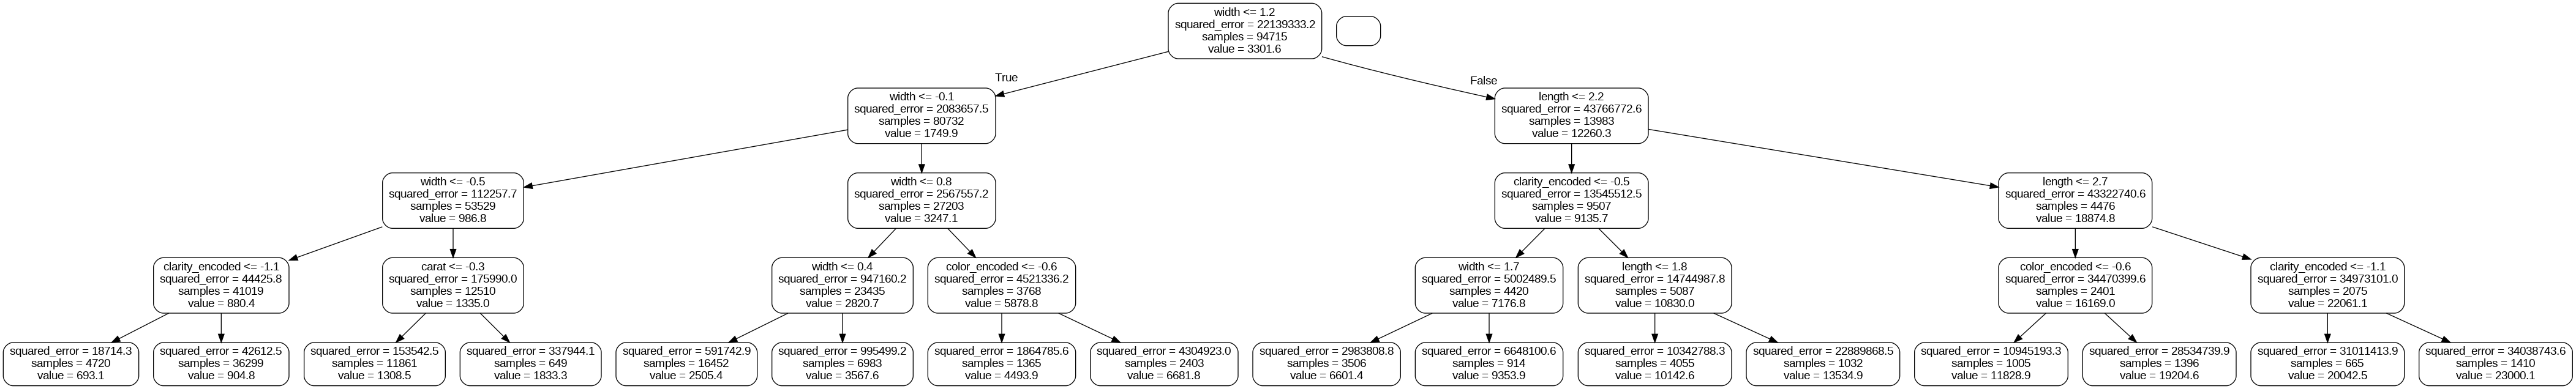

In [ ]:
tree = vis_tree.estimators_[1]
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_names, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('tree.dot')
Image(graph.create_png())

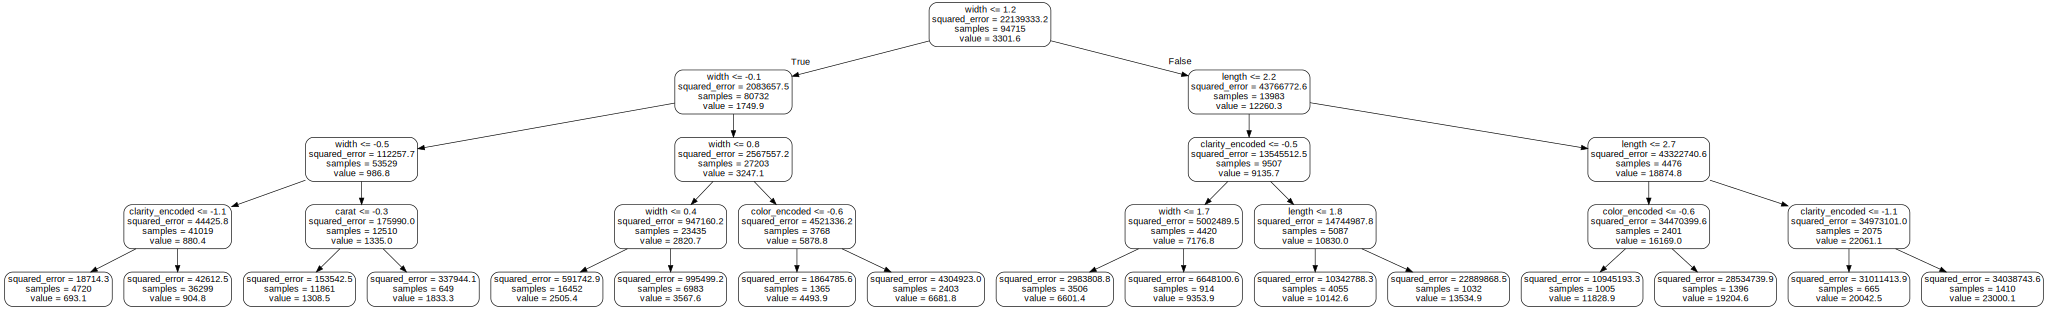

In [ ]:
graphviz.Source.from_file('tree.dot')

**Train-Test Split Data**

In [ ]:
# Define the hyperparameters grid
param_grid = {
    'max_features': [8, 10, 20, "auto", "sqrt", "log2"],
    'n_estimators': [50, 100],
    'max_depth': [None, 4, 5, 10]
}

# Create a RandomForestRegressor instance
rf_model = RandomForestRegressor(random_state=42)

# Initialize GridSearchCV with the defined parameter grid and cross-validation strategy
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=10)

# Fit the grid search to the training data
grid_search.fit(X_train, Y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train the model with the best hyperparameters
best_rf_model = RandomForestRegressor(**best_params, random_state=42)
best_rf_model.fit(X_train, Y_train)

# Predict on the test set
Y_pred = best_rf_model.predict(X_test)

# Calculate test RMSE
test_rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))

# Get the RMSE for each fold during cross-validation
cv_rmse = np.sqrt(-grid_search.cv_results_['mean_test_score'])

# Print the results
print("Best hyperparameters:", best_params)
print("Test RMSE:", test_rmse)
print("CV RMSE:", cv_rmse)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

Best hyperparameters: {'max_depth': 10, 'max_features': 8, 'n_estimators': 100}
Test RMSE: 650.9824075604025
CV RMSE: [ 673.48233343  669.71550976  673.48233343  669.71550976  673.48233343
  669.71550976  673.48233343  669.71550976  674.43041448  668.90263862
  674.43041448  668.90263862 1405.39452196 1401.80918557 1405.39452196
 1401.80918557 1405.39452196 1401.80918557 1405.39452196 1401.80918557
 1406.6916329  1402.64887342 1406.6916329  1402.64887342 1130.93636642
 1126.89322228 1130.93636642 1126.89322228 1130.93636642 1126.89322228
 1130.93636642 1126.89322228 1239.53948347 1228.26123363 1239.53948347
 1228.26123363  657.98870909  656.82844802  657.98870909  656.82844802
  657.98870909  656.82844802  657.98870909  656.82844802  734.12031641
  732.33071574  734.12031641  732.33071574]


In [ ]:
vis_tree = RandomForestRegressor(random_state=42,max_depth=4, max_features=3, n_estimators=10).fit(X_train,Y_train)

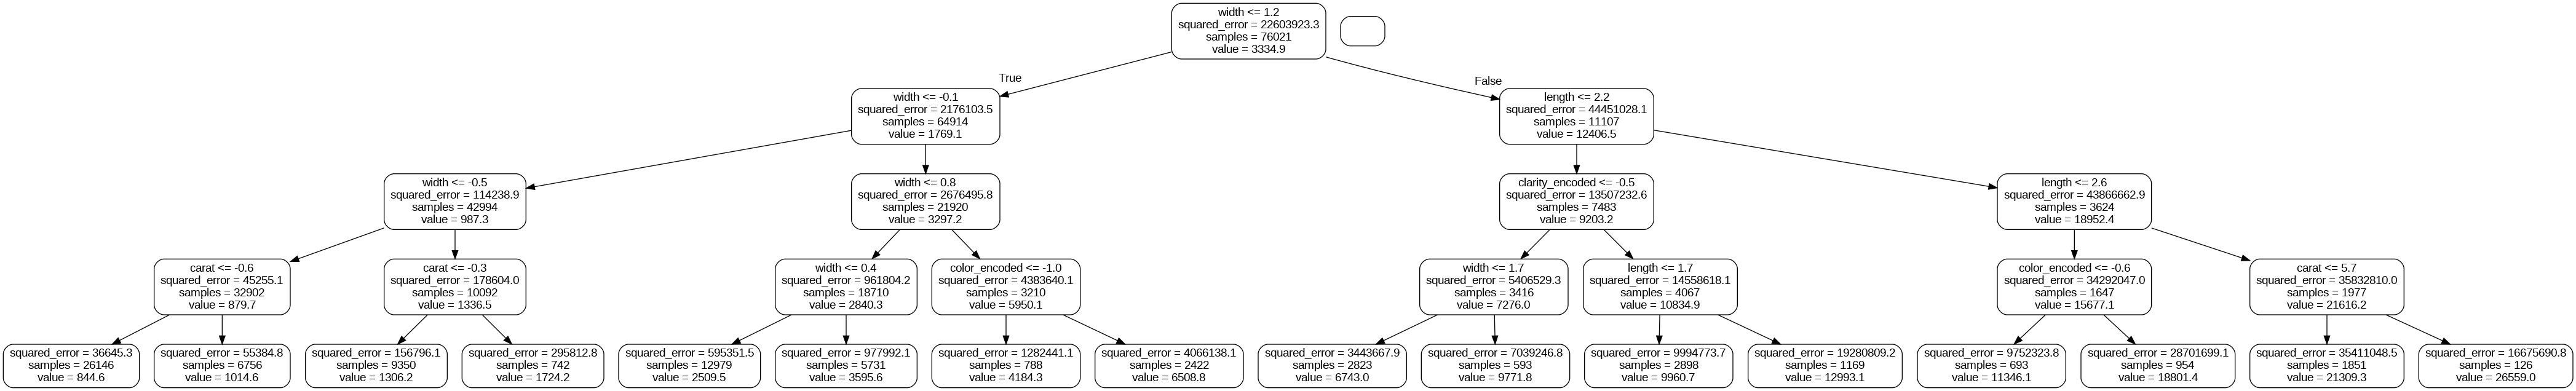

In [ ]:
tree = vis_tree.estimators_[1]
export_graphviz(tree, out_file = 'tree1.dot', feature_names = feature_names, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('tree1.dot')
Image(graph.create_png())

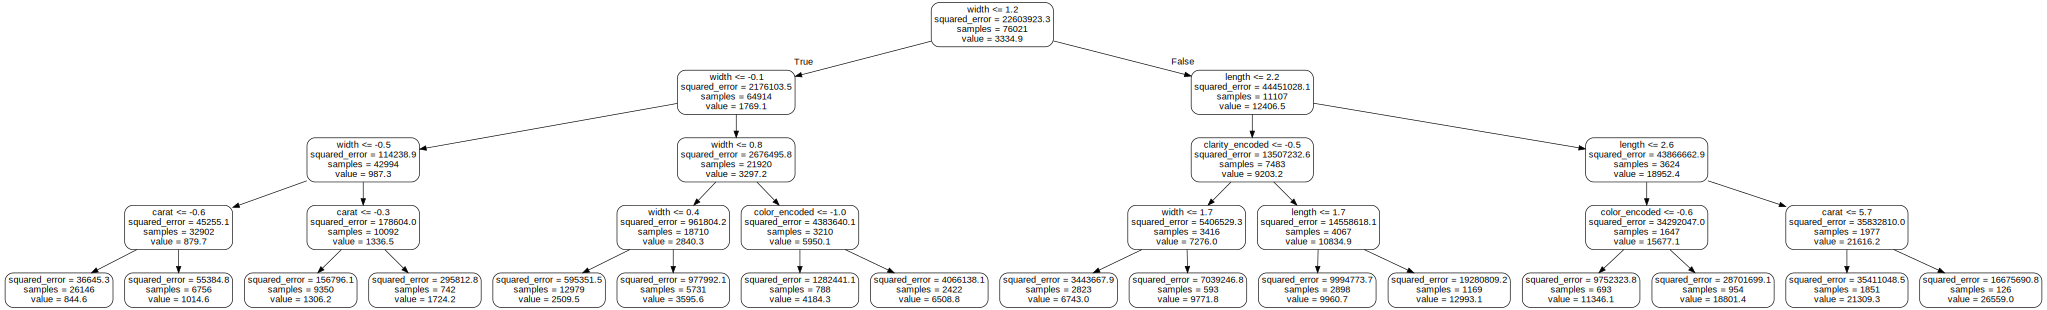

In [ ]:
graphviz.Source.from_file('tree1.dot')

QUESTION 7

We will train a random forest regression model on datasets, and answer the following: • Random forests have the following hyper-parameters:
- Maximum number of features;
-  Number of trees;
- Depth of each tree;

> The below values gave the best performance:\
Best hyperparameters: {'max_depth': 10, 'max_features': 8, 'n_estimators': 100}\
Test RMSE: 650.9824075604025

* Question 7.1 - Explain how these hyper-parameters affect the overall performance. Describe if and how each hyper-parameter results in a regularization effect during training.

> Maximum number of features - This hyperparameter is used to decide the maximum number of features that will be considered while splitting at each node in each decision tree. The higher this number, the greater the number of splits and hence more diverse trees. This will help it capture complex patterns and relations in the data. But, for high dimensional data, setting this value too high can lead to overfitting. Reducing the maximum number of features can help prevent overfitting by limiting the diversity of trees and promoting simpler models.

> Number of trees - This hyperparameter is used to define the number of decision trees in the random forest. As we increase the number of trees, the robustness and scalability increases as the variance in the predictions reduces. But, adding more trees also adds computational complexity and training time. Using too few trees can lead to underfitting. This is why finding the optimum number of trees is really important.

> Depth of each tree - This hyperparameter is used to decide the maximum depth of each decision tree in the random forest. Increasing the depth lead to increasing the complexity that can be captured. But, deeper trees can lead to overfitting especially when the data is noisy or has a lot of outliers. Limiting the depth of each tree can regularize the model by promoting simpler tree structures and reducing the risk of overfitting.

> Each of these hyperparameters can have a regularization effect during training by controlling the complexity of the random forest model and preventing overfitting. Regularization wants to reduce the complexity of the models and promote simple models that can generalize over unseen data. By finding the optimal values for these hyperparameters, we can create a balance between model complexity and generalization performance. We hence get a more robust and effective random forest model.

* Question 7.2 - How do random forests create a highly non-linear decision boundary despite the fact that all we do at each layer is apply a threshold on a feature?

> Random forests do so by combining multiple decision trees. Each of them is trained on a different subset of the data and features. Random Forests use an ensemble learning technique, where multiple decision trees are trained independently and then combined to make predictions. Each decision tree in the ensemble learns to capture different aspects of the data, resulting in a diverse set of base models. Random Forest also uses feature randomization. At each node of each decision tree, only a random subset of features is considered for splitting. With this, we can have diversity. Each tree in the Random Forest learns a different decision boundary. Some trees may focus on certain features or patterns in the data, while others focus on different features or patterns. Hence , it can capture a wide range of features and patterns in the data. To make predictions, Random Forests aggregate the predictions of individual decision trees. Random Forests are robust to noise and outliers in the data. They are also less prone to overfitting compared to individual decision trees. The ensemble nature of Random Forests allows them to generalize well to unseen data and capture complex non-linear relationships between input features and the target variable. A random forest has a large number of uncorrelated models with the final target variable being a majority decision fusion from all the trees.

* Question 7.3 - Randomly pick a tree in your random forest model (with maximum depth of 4) and plot its structure. Which feature is selected for branching at the root node? What can you infer about the importance of this feature as opposed to others? Do the important features correspond to what you got in part 3.3.1?

> Please refer to the figure above. The feature that is selected at the root node for branching is width. This feature is selected for branching at the root node. This means that it is the most important feature used to start the splitting process.In a decision tree, the features closer to the root node are more salient and significant than the features near the leaf nodes. Based on p values, we observed that the most significant features were carat, color and clarity. We do observe carat, color and clarity as important features here as well. Thus, it is safe to say that the most important features found from p-values of linear regression have significant overlap with the most important features found in a random decision tree within the random forest for the Diamond dataset.

* Question 7.4 - Measure “Out-of-Bag Error” (OOB). Explain what OOB error and R2 score means.

> Best Out-of-bag error: 0.019290294968740906.\
 Out of the Bag Error is used for measuring the performance of the model. In random forests, each decision tree is trained on a sample of the dataset. This sample is created by random sampling the original dataset with replacement. Therefore, some values may be included in this sample and some may not. The out-of-bag (OOB) error is calculated as the average error of the model on those observations that were not included in the bootstrap sample used to train a particular decision tree. Observations that were not included in the sample are considered "out-of-bag" for that particular tree. OOB error is the average error of all out of the bag observations. It is an unbiased estimate of the models performance on data it has not seen earlier. It is useful in random forests because it allows us to evaluate the models performance while utilizing all the data available for training. The R-squared (R2) score, also known as the coefficient of determination, is a metric used to evaluate the performance of a regression model. It measures the proportion of the variance in the target variable that is explained by the features of the model. It ranges from 0 to 1. 0 means that the model does not explain the variance in the target model and 1 means that the model perfectly explains the variance. The total sum of squares represents the total variance in the target variable, while the sum of squared residuals represents the unexplained variance by the model. The R2 score is then calculated as 1 minus the ratio of the sum of squared residuals to the total sum of squares. R2 score tells us how well the regression model fits the data. If the score is higher, it means that it fits well. However, R2 score alone does not provide information about how good the fit is relative to the complexity of the model.


# **Question 8**

**Scaled Reduced Data**

In [ ]:
# Define the search space
param_space = {
    'num_leaves': (20, 100),
    'learning_rate': (0.01, 0.1),
    'max_depth': (5, 15),
    'min_child_samples': (10, 30),
    'subsample': (0.7, 0.9)
}

# Initialize LightGBM regressor
lgbm = LGBMRegressor()

# Initialize BayesSearchCV
bayes_search = BayesSearchCV(
    estimator=lgbm,
    search_spaces=param_space,
    scoring='neg_root_mean_squared_error',
    cv=10,
    n_iter=50,
    n_jobs=-1,
    random_state=42
)

# Perform Bayesian optimization
bayes_search.fit(X_Reduced_df, Y)

# Get the best hyperparameters and corresponding RMSE
best_params = bayes_search.best_params_
best_rmse = np.abs(bayes_search.best_score_)

# Print the best hyperparameters and corresponding RMSE
print("Best Hyperparameters:", best_params)
print("Best RMSE:", best_rmse)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002918 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1040
[LightGBM] [Info] Number of data points in the train set: 149871, number of used features: 6
[LightGBM] [Info] Start training from score 3303.915487
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Best Hyperparameters: OrderedDict([('learning_rate', 0.09528883771178825), ('max_depth', 5), ('min_child_samples', 10), ('num_leaves', 20), ('subsample', 0.7)])
Best RMSE: 1169.2084391054757


**Scaled Reduced Skewed Data**

In [ ]:
# Trying on reduced scaled skewed data
# Define the search space
param_space = {
    'num_leaves': (20, 100),
    'learning_rate': (0.01, 0.1),
    'max_depth': (5, 15),
    'min_child_samples': (10, 30),
    'subsample': (0.7, 0.9)
}

# Initialize LightGBM regressor
lgbm = LGBMRegressor()

# Initialize BayesSearchCV
bayes_search = BayesSearchCV(
    estimator=lgbm,
    search_spaces=param_space,
    scoring='neg_root_mean_squared_error',
    cv=10,
    n_iter=50,
    n_jobs=-1,
    random_state=42
)

# Perform Bayesian optimization
bayes_search.fit(X_Reduced_skewed_df, Y_skewed)

# Get the best hyperparameters and corresponding RMSE
best_params = bayes_search.best_params_
best_rmse = np.abs(bayes_search.best_score_)

# Print the best hyperparameters and corresponding RMSE
print("Best Hyperparameters:", best_params)
print("Best RMSE:", best_rmse)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009184 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1040
[LightGBM] [Info] Number of data points in the train set: 149871, number of used features: 6
[LightGBM] [Info] Start training from score 7.529973
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

**Train-Test Split Data**

In [ ]:
# Define the search space
param_space = {
    'num_leaves': (20, 100),
    'learning_rate': (0.01, 0.1),
    'max_depth': (5, 15),
    'min_child_samples': (10, 30),
    'subsample': (0.7, 0.9)
}

# Initialize LightGBM regressor
lgbm = LGBMRegressor()

# Initialize BayesSearchCV
bayes_search = BayesSearchCV(
    estimator=lgbm,
    search_spaces=param_space,
    scoring='neg_root_mean_squared_error',
    cv=10,
    n_iter=50,
    n_jobs=-1,
    random_state=42
)

# Perform Bayesian optimization
bayes_search.fit(X_train, Y_train)

# Get the best hyperparameters and corresponding RMSE
best_params = bayes_search.best_params_
best_rmse = np.abs(bayes_search.best_score_)

# Print the best hyperparameters and corresponding RMSE
print("Best Hyperparameters:", best_params)
print("Best RMSE:", best_rmse)

# Evaluate on test set
test_rmse = np.sqrt(np.mean((bayes_search.predict(X_test) - Y_test) ** 2))
print("Test RMSE:", test_rmse)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011915 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1040
[LightGBM] [Info] Number of data points in the train set: 119896, number of used features: 6
[LightGBM] [Info] Start training from score 3301.934935
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga

QUESTION 8

In this part, pick either one of the datasets and apply LightGBM OR CatBoost. If you do both, we will only look at the first one.
* Question 8.1 - Read the documentation of LightGBM OR CatBoost and determine the important hyperparameters along with a search space for the tuning of these parameters (keep the search space small).

> I have implemented LightGBM. Important hyper parameters are:
- num_leaves - It controls the maximum number of leaves in each tree. The higher the value the more complex the model and can lead to overfitting.
- learning_rate - This controls the step size during gradient boosting. Lower values result in slower learning but can lead to better generalization.
- max_depth - Maximum depth of each tree. Higher values make the model more complex and increase the likelihood of overfitting.
- min_data_in_leaf: Minimum number of data points in each leaf. Larger values can prevent overfitting but may lead to underfitting.
- feature_fraction: Fraction of features to consider for each tree. Lower values can help reduce overfitting by introducing randomness.
- boosting_type - It determines the type of boosting technique used during training. Boosting is an ensemble learning technique that combines multiple weak learners (usually decision trees) sequentially to create a strong learner. Different boosting techniques introduce variations in how the weak learners are combined. Different values are gbdt (Gradient Boosting Decision Tree), rf (Random Forest), dart (Dropouts meet Multiple Additive Regression Trees), goss (Gradient-based One-Side Sampling).


* Question 8.2 - Apply Bayesian optimization using skopt.BayesSearchCV from scikit-optmize to find the ideal hyperparameter combination in your search space. Keep your search space small enough to finish running on a single Google Colab instance within 60 minutes. Report the best hyperparameter set found and the corresponding RMSE.

>In Bayesian optimization, a Gaussian process is utilized to approximate the objective function, which allows priors on the distribution of moments such as mean and uncertainty to propagate in the forward direction as the search process progresses.\
I tried on various values with different hyperparameters as mentioned below:\
param_space = {\
    'num_leaves': (20, 100),\
    'learning_rate': (0.01, 0.1),\
    'max_depth': (5, 15),\
    'min_child_samples': (10, 30),\
    'subsample': (0.7, 0.9)\
}\
The ideal hyperparameters found were as below:\
Best Hyperparameters: OrderedDict([('learning_rate', 0.08332138524886121), ('max_depth', 10), ('min_child_samples', 24), ('num_leaves', 95), ('subsample', 0.7143758614840212)])\
Best RMSE: 627.647251922508\
Test RMSE: 620.691045915077


* Question 8.3 - Qualitatively interpret the effect of the hyperparameters using the Bayesian optimization results: Which of them helps with performance? Which helps with reg- ularization (shrinks the generalization gap)? Which affects the fitting efficiency?

>Different hyperparameters impact the model's performance, regularization, and fitting efficiency in the following ways:\
Performance Improvement - Hyperparameters that directly influence the model's ability to capture patterns in the data or reduce error typically lead to performance improvement. If we increase the number of trees, the model's predictive power by incorporating more diverse and robust decision boundaries.\
Regularization - It controls the complexity of the model and helps prevent overfitting, thereby reducing the generalization gap. For instance, parameters like the regularization strength (lambda) in ridge regression or the maximum depth of trees in decision trees can be tuned to balance between fitting the training data well and avoiding overfitting on unseen data.\
Fitting efficiency - Certain hyperparameters may affect the model's fitting efficiency, influencing how quickly the model converges to an optimal solution during training. For example, the learning rate in gradient boosting algorithms or the kernel bandwidth in kernel methods can impact the convergence speed and overall efficiency of the training process.\
In Bayesian optimization, the goal is to find the optimal combination of hyperparameters that maximizes the model's performance while maintaining good generalization and efficient training. By analyzing the impact of different hyperparameters on these aspects, one can determine which ones contribute most significantly to each criterion and adjust them accordingly to achieve better overall results. We have tried various hyperparameters as shown above. Increasing the number of trees generally leads to better model performance by capturing more complex patterns in the data. However, adding too many trees can risk overfitting. A lower learning rate typically results in slower but more robust learning, allowing the model to generalize better. We see above that we have a lower learning rate. Deeper trees can capture more complex relationships in the data, potentially improving performance. However, excessively deep trees can also lead to overfitting, especially with smaller datasets. For our dataset, a depth of 10 worked the best. Randomly subsampling the training data for each tree can introduce regularization, preventing the model from overfitting to the training set. Our best subsample value was 0.7. Increasing the number of leaves per tree can improve the model's capacity to capture complex interactions but may also increase computational complexity and training time. By tuning these hyperparameters using Bayesian optimization or other techniques, one can strike a balance between model performance, regularization, and fitting efficiency to achieve the best overall results for the specific task and dataset at hand.
